<a href="https://colab.research.google.com/github/nestorpalacios/MVP1/blob/main/MVP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib==3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 59.2 MB/s eta 0:00:00


In [ ]:
## Carrega bibliotecas utilizadas

import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch, Polygon
from matplotlib.lines import Line2D
import plotly.express as px
import plotly.graph_objects as go

import missingno as ms # para tratamento de missings
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from IPython.display import display, Markdown
import seaborn

In [ ]:

## Verifica a versão da matplotlib instalada
mpl.__version__

'3.5.3'

In [427]:
# carga do dataset através de um arquivo
filename1 = 'https://raw.githubusercontent.com/nestorpalacios/MVP1/main/masterwell.csv' # este arquivo deve estar dentro da aba "Arquivos" do Colab
filename2 = 'https://raw.githubusercontent.com/nestorpalacios/MVP1/main/prdWell.csv' # este arquivo deve estar dentro da aba "Arquivos" do Colab
masterwell = pd.read_csv(filename1) # se o cabeçalho estiver sendo importado como dados, use o parâmetro skiprows = 1 na função read_csv
prodwell = pd.read_csv(filename2, parse_dates=['DATE'], dayfirst=True) # se o cabeçalho estiver sendo importado como dados, use o parâmetro skiprows = 1 na função read_csv
# verifica o tipo de iris
print(type(masterwell))
print(type(prodwell))

# exibe as 5 primeiras linhas
masterwell.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,Completion,Wellbore,xcoor,ycoor,Avg_depth,Sand,Station
0,AL-1:A,AL-1,478926.98,10851477.60,4318.0,A,LB-02
1,AL-10:A,AL-10,478268.42,10850586.12,5153.0,A,LB-03
2,AL-10:C,AL-10,478268.42,10850586.12,NaN,C,LB-03
3,AL-11:B,AL-11,477892.10,10850510.88,3802.0,B,LB-03
4,AL-12:B,AL-12,477211.00,10849454.10,3624.0,B,LB-01


In [361]:
masterwell.isnull().sum()

Completion     0
Wellbore       0
xcoor          0
ycoor          0
Avg_depth     11
Sand           0
Station        0
dtype: int64

<AxesSubplot:>

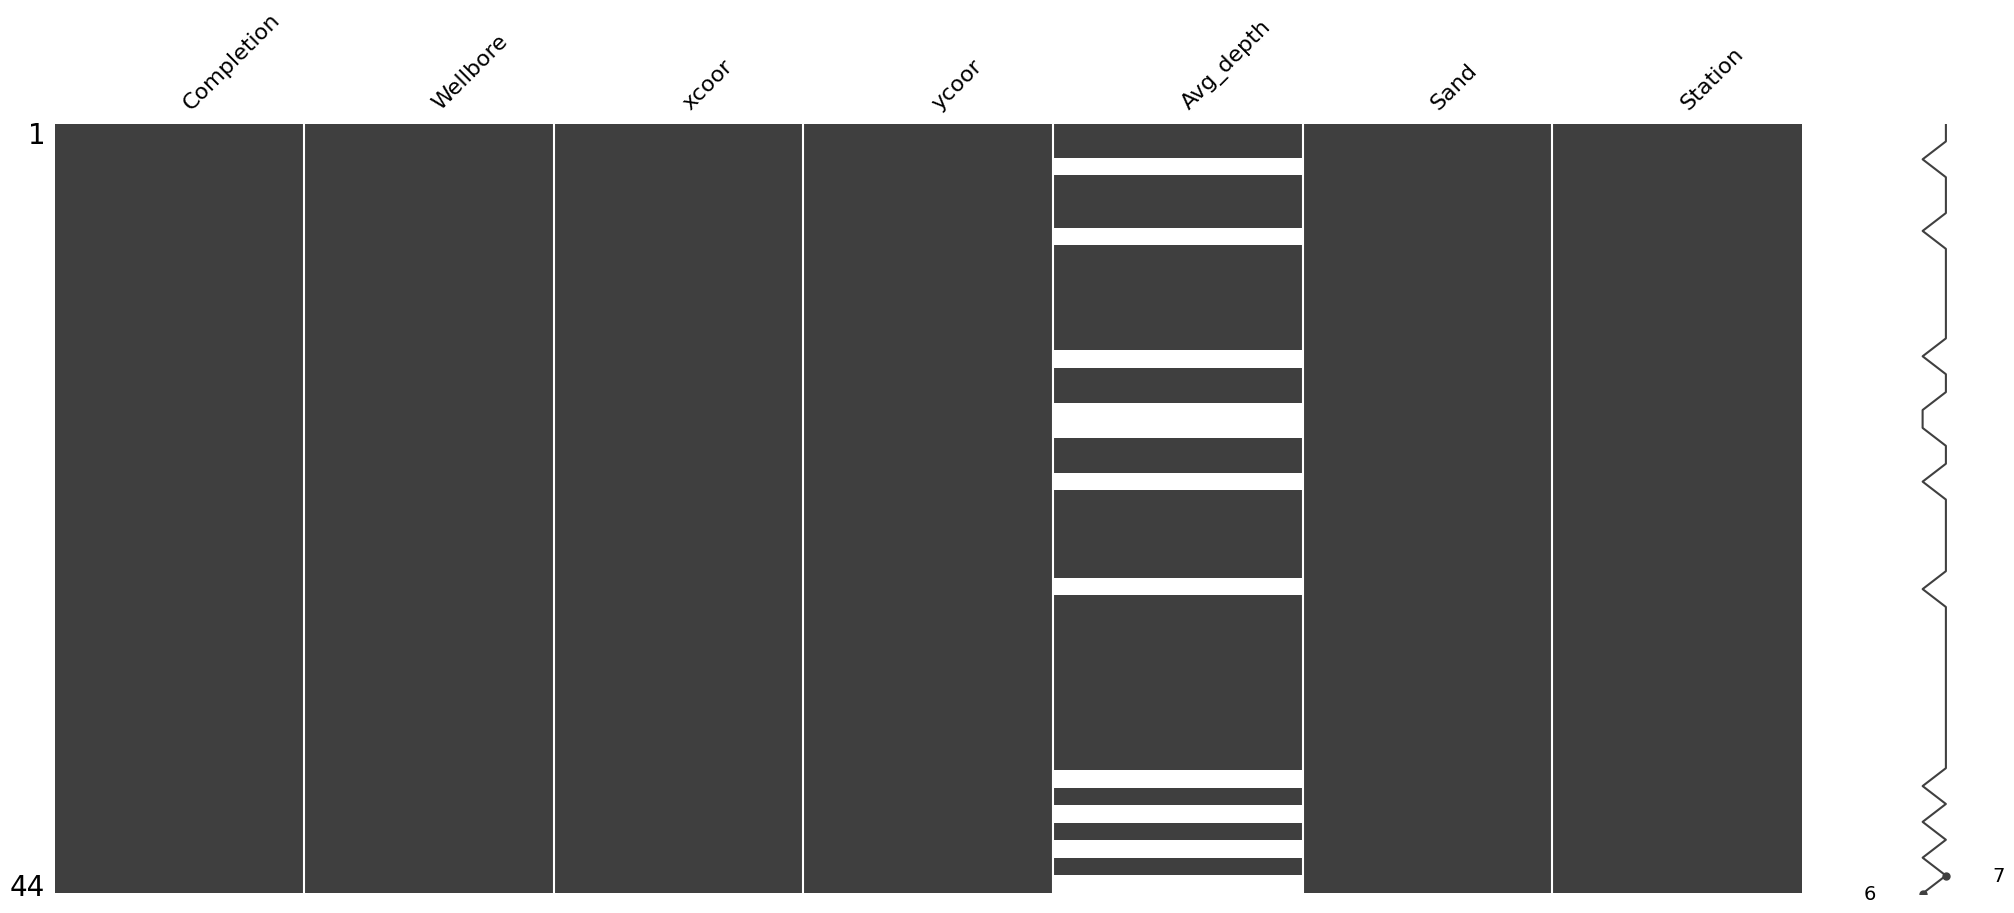

In [362]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(masterwell.columns)

# o novo dataset irá conter todas as colunas do dataset original
masterwellSemMissings = masterwell[col[:]]

# substituindo os zeros por NaN
masterwellSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(masterwellSemMissings)

In [363]:
masterwellSemMissings.isnull().sum()

Completion     0
Wellbore       0
xcoor          0
ycoor          0
Avg_depth     11
Sand           0
Station        0
dtype: int64

In [364]:
masterwellSemMissings.count()

Completion    44
Wellbore      44
xcoor         44
ycoor         44
Avg_depth     33
Sand          44
Station       44
dtype: int64

In [413]:
masterwellSemMissings.describe()

,xcoor,ycoor,Avg_depth
count,44.000000,4.400000e+01,33.000000
mean,477984.683495,1.085019e+07,4046.636364
std,546.235514,7.222532e+02,549.034711
min,477187.480000,1.084863e+07,3513.000000
25%,477546.895000,1.084958e+07,3650.000000
50%,477885.730000,1.085019e+07,3778.000000
75%,478268.420000,1.085071e+07,4353.000000
max,479065.160000,1.085152e+07,5313.000000


In [428]:
masterwellSemMissings.nunique()

Completion    44
Wellbore      36
xcoor         36
ycoor         36
Avg_depth     33
Sand           3
Station        4
dtype: int64

In [429]:
prodwell.isnull().sum()

DATE             0
Completion       0
pet            321
gas            998
agua          1732
dtype: int64

<AxesSubplot:>

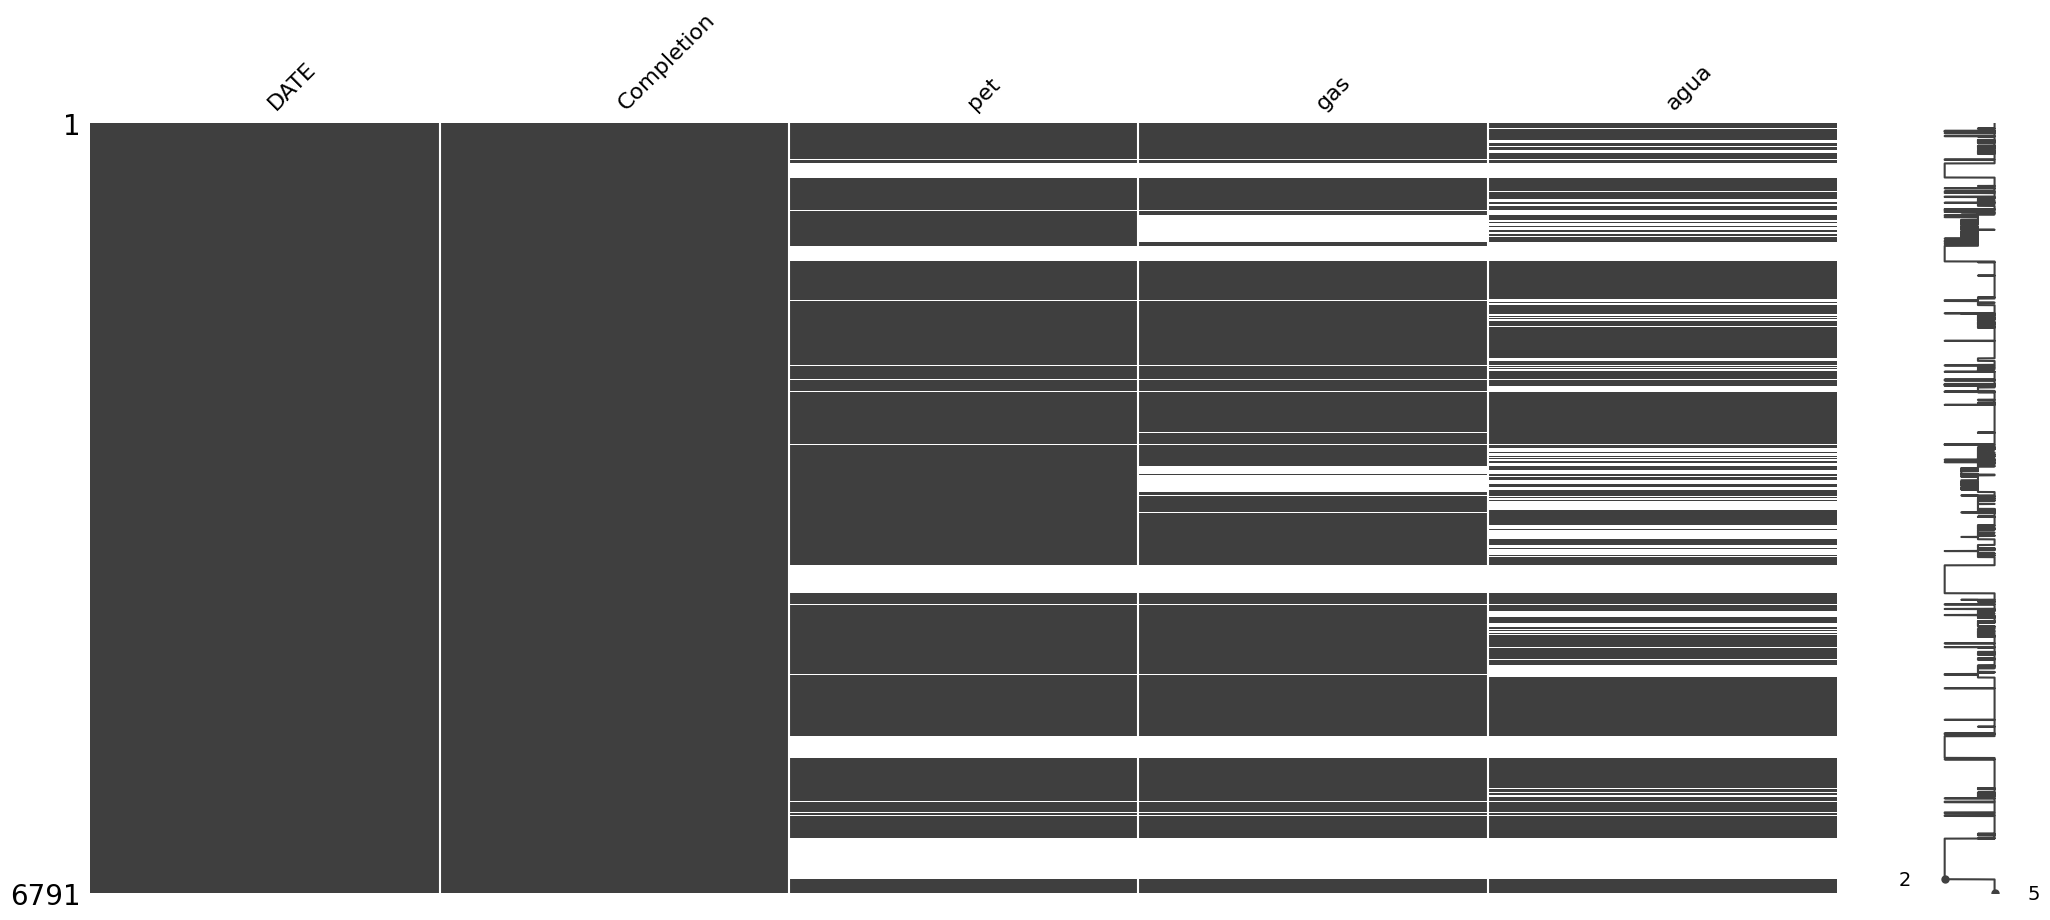

In [430]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(prodwell.columns)

# o novo dataset irá conter todas as colunas do dataset original
prodwellSemMissings = prodwell[col[:]]

# substituindo os zeros por NaN
prodwellSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(prodwellSemMissings)

In [431]:
prodwellSemMissings.isnull().sum()

DATE             0
Completion       0
pet           1192
gas           1657
agua          2475
dtype: int64

<AxesSubplot:>

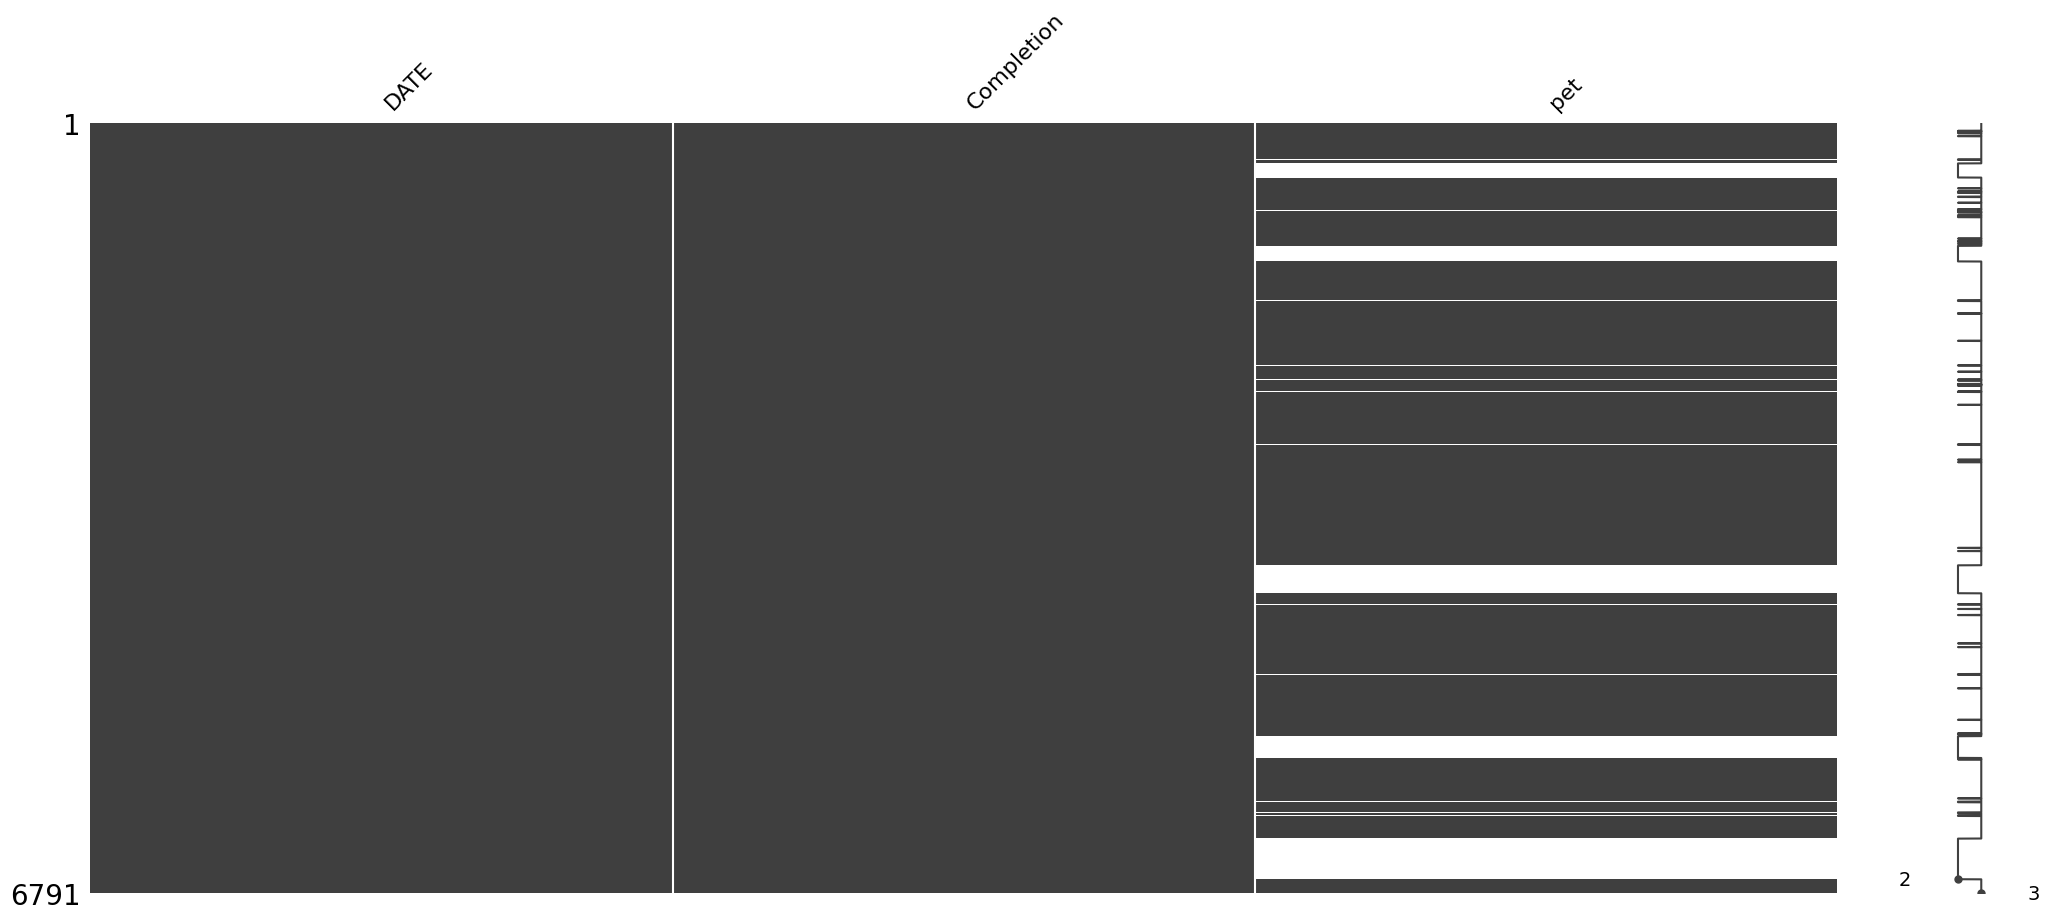

In [432]:
# removendo as colunas 'SkinThickness' e 'Insulin'
prodwellSemMissings.drop(['gas', 'agua'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(prodwellSemMissings)
     

<AxesSubplot:>

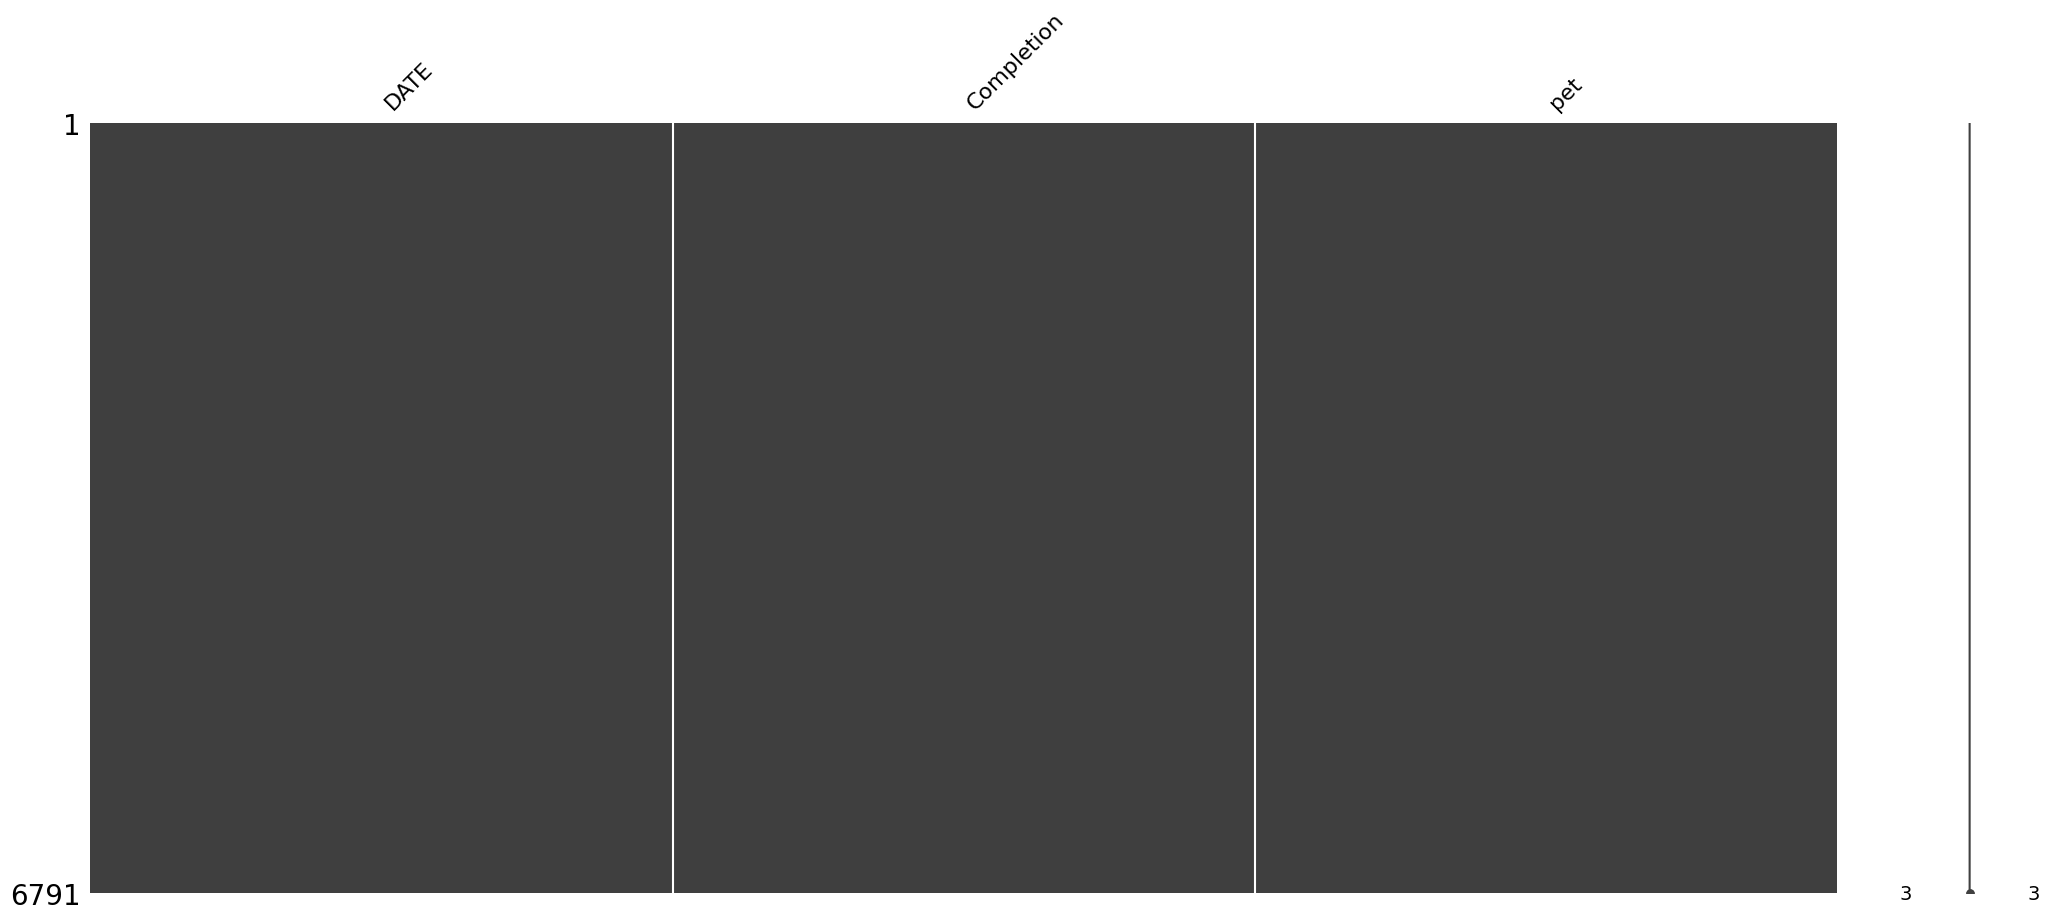

In [433]:
# substituindo os NaN de 'Pregnancies' e 'Outcome' por 0 - voltando aos valores originais destas colunas
prodwellSemMissings['pet'].fillna(0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(prodwellSemMissings)

In [434]:
prodwellSemMissings.head()

,DATE,Completion,pet
0,1964-04-01,AL-1:A,4119.0
1,1964-05-01,AL-1:A,9788.0
2,1964-06-01,AL-1:A,9003.0
3,1964-07-01,AL-1:A,8635.0
4,1964-08-01,AL-1:A,7568.0


In [435]:
prodwellSemMissings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        6791 non-null   datetime64[ns]
 1   Completion  6791 non-null   object        
 2   pet         6791 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 159.3+ KB


In [436]:
fig=px.scatter(masterwell,x="xcoor", y="ycoor", width=1000, height=800,
           labels={
                     "xcoor": "Coordenadas X (m)",
                     "ycoor": "Coordenadas Y (m)",
                 },
                title="Localização dos poços - Field A", text="Wellbore")

fig.update_traces(textposition="bottom center")
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_layout(plot_bgcolor='white',
                  title_x=0.5)
fig.show()

In [437]:
fig=px.scatter(masterwell,x="xcoor", y="ycoor", color= "Sand", width=1000, height=800,
           labels={
                     "xcoor": "Coordenadas X (m)",
                     "ycoor": "Coordenadas Y (m)",
                     "Sand": "Zona Produtora"
                 },
                title="Localização dos poços pelo Zona Produtora - Field A", text="Wellbore")


fig.update_traces(textposition="bottom center")
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_layout(plot_bgcolor='white',
                  title_x=0.5)
fig.show()

In [438]:
def duong(t, qi, m, a):

    qd = (qi * np.power(t,-m))* np.exp((a / (1 - m)) * ((np.power(t,(1-m))) - 1))
    return qd

def arps(t, b, qi, Di):
    if b==0:
        qa= qi*np.exp(-Di*t)
    else:
        qa= qi/((1+b*Di*t)**(1/b))
    return qa

In [439]:
prodwellSemMissings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6791 entries, 0 to 6790
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        6791 non-null   datetime64[ns]
 1   Completion  6791 non-null   object        
 2   pet         6791 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 159.3+ KB


In [456]:
df=prodwellSemMissings
print(df)

           DATE Completion     pet
0    1964-04-01     AL-1:A  4119.0
1    1964-05-01     AL-1:A  9788.0
2    1964-06-01     AL-1:A  9003.0
3    1964-07-01     AL-1:A  8635.0
4    1964-08-01     AL-1:A  7568.0
...         ...        ...     ...
6786 2016-08-01     AL-9:C   113.0
6787 2016-09-01     AL-9:C   110.0
6788 2016-10-01     AL-9:C    85.0
6789 2016-11-01     AL-9:C    90.0
6790 2016-12-01     AL-9:C   114.0

[6791 rows x 3 columns]


In [457]:
# Unpivot the DataFrame using melt()
prdwellfix = pd.pivot_table(df, index = ['DATE'] , columns = 'Completion', values = 'pet') 
prdwellfix.head()

Completion,AL-10:A,AL-10:C,AL-11:B,AL-12:B,AL-13:A,AL-13:C,AL-14:B,AL-15:A,AL-16:B,AL-17:B,...,AL-4:A,AL-5:A,AL-6:A,AL-6:C,AL-7:A,AL-7:C,AL-8:A,AL-8:C,AL-9:A,AL-9:C
DATE,,,,,,,,,,,,,,,,,,,,,
1964-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [458]:
#format column names
prdwellfix.columns = ['_'.join(str(s).strip() for s in col if s) for col in prdwellfix.columns]

#reset index
prdwellfix.reset_index(inplace=True)

#view updated pivot table
print(prdwellfix)

          DATE  A_L_-_1_0_:_A  A_L_-_1_0_:_C  A_L_-_1_1_:_B  A_L_-_1_2_:_B  \
0   1964-04-01            NaN            NaN            NaN            NaN   
1   1964-05-01            NaN            NaN            NaN            NaN   
2   1964-06-01            NaN            NaN            NaN            NaN   
3   1964-07-01            NaN            NaN            NaN            NaN   
4   1964-08-01            NaN            NaN            NaN            NaN   
..         ...            ...            ...            ...            ...   
702 2022-10-01            NaN            NaN            NaN            NaN   
703 2022-11-01            NaN            NaN            NaN            NaN   
704 2022-12-01            NaN            NaN            NaN            NaN   
705 2023-01-01            NaN            NaN            NaN            NaN   
706 2023-02-01            NaN            NaN            NaN            NaN   

     A_L_-_1_3_:_A  A_L_-_1_3_:_C  A_L_-_1_4_:_B  A_L_-_1_5_:_A

In [463]:
prdwellfix.columns = prdwellfix.columns.str.replace('[_]','')
prdwellfix

<ipython-input-463-c13a38d6e938>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



,DATE,AL-10:A,AL-10:C,AL-11:B,AL-12:B,AL-13:A,AL-13:C,AL-14:B,AL-15:A,AL-16:B,...,AL-4:A,AL-5:A,AL-6:A,AL-6:C,AL-7:A,AL-7:C,AL-8:A,AL-8:C,AL-9:A,AL-9:C
0,1964-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1964-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1964-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1964-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,NaN
703,2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN
704,2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN
705,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,142.0,NaN,NaN,NaN,NaN,NaN,NaN


In [464]:
prdwellfix.describe()

,AL-10:A,AL-10:C,AL-11:B,AL-12:B,AL-13:A,AL-13:C,AL-14:B,AL-15:A,AL-16:B,AL-17:B,...,AL-4:A,AL-5:A,AL-6:A,AL-6:C,AL-7:A,AL-7:C,AL-8:A,AL-8:C,AL-9:A,AL-9:C
count,151.000000,195.000000,51.000000,449.000000,32.000000,452.000000,273.000000,267.000000,80.000000,56.000000,...,140.000000,68.000000,50.000000,558.000000,259.000000,263.000000,93.000000,312.000000,402.000000,122.000000
mean,2019.026490,100.800000,791.470588,163.583519,1032.875000,338.588496,701.054945,653.307116,185.375000,374.178571,...,1386.057143,5292.529412,2827.120000,1032.944444,500.359073,245.212928,2737.645161,415.394231,105.410448,132.680328
std,1591.301735,146.454863,367.618626,295.562573,916.826847,255.855027,1007.682468,569.682905,164.886488,208.589733,...,1066.305271,3327.937627,1459.163762,1543.147315,1256.458339,114.568325,1752.956178,292.685539,359.042768,34.725908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1286.000000,1239.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000
25%,1033.500000,0.000000,594.000000,24.000000,629.000000,0.000000,208.000000,340.500000,73.750000,248.500000,...,697.750000,3080.500000,1879.750000,219.000000,0.000000,168.500000,1390.000000,241.500000,0.000000,112.000000
50%,1488.000000,0.000000,739.000000,46.000000,816.500000,407.000000,315.000000,456.000000,93.000000,324.000000,...,1037.000000,4709.500000,2603.000000,403.000000,0.000000,220.000000,2307.000000,340.500000,0.000000,128.500000
75%,2594.500000,217.000000,974.500000,126.000000,1079.500000,463.500000,821.000000,714.500000,300.750000,425.500000,...,1664.000000,6462.250000,3440.750000,1087.000000,0.000000,298.000000,3573.000000,516.250000,0.000000,149.000000
max,11603.000000,590.000000,2041.000000,2223.000000,4871.000000,1164.000000,10405.000000,3274.000000,696.000000,1136.000000,...,6180.000000,20947.000000,9500.000000,12742.000000,11381.000000,1087.000000,7315.000000,1934.000000,3291.000000,313.000000


In [465]:
prdwellfix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 45 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     707 non-null    datetime64[ns]
 1   AL-10:A  151 non-null    float64       
 2   AL-10:C  195 non-null    float64       
 3   AL-11:B  51 non-null     float64       
 4   AL-12:B  449 non-null    float64       
 5   AL-13:A  32 non-null     float64       
 6   AL-13:C  452 non-null    float64       
 7   AL-14:B  273 non-null    float64       
 8   AL-15:A  267 non-null    float64       
 9   AL-16:B  80 non-null     float64       
 10  AL-17:B  56 non-null     float64       
 11  AL-18:B  121 non-null    float64       
 12  AL-19:B  66 non-null     float64       
 13  AL-1:A   205 non-null    float64       
 14  AL-20:B  66 non-null     float64       
 15  AL-21:A  112 non-null    float64       
 16  AL-21:C  107 non-null    float64       
 17  AL-22:C  300 non-null    float64   

In [470]:
df= prdwellfix
prdwellfix


,DATE,AL-10:A,AL-10:C,AL-11:B,AL-12:B,AL-13:A,AL-13:C,AL-14:B,AL-15:A,AL-16:B,...,AL-4:A,AL-5:A,AL-6:A,AL-6:C,AL-7:A,AL-7:C,AL-8:A,AL-8:C,AL-9:A,AL-9:C
0,1964-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1964-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1964-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1964-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,NaN
703,2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN
704,2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN
705,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,142.0,NaN,NaN,NaN,NaN,NaN,NaN


In [471]:
min_time = min(df['DATE'])
min_time 
df['tiempo en dias'] = df['DATE'] - min_time
df['tiempo en dias'] = df['tiempo en dias'].dt.days +0.001
#df['tiempo en dias'][0] = df['tiempo en dias'][0]+0.001

44


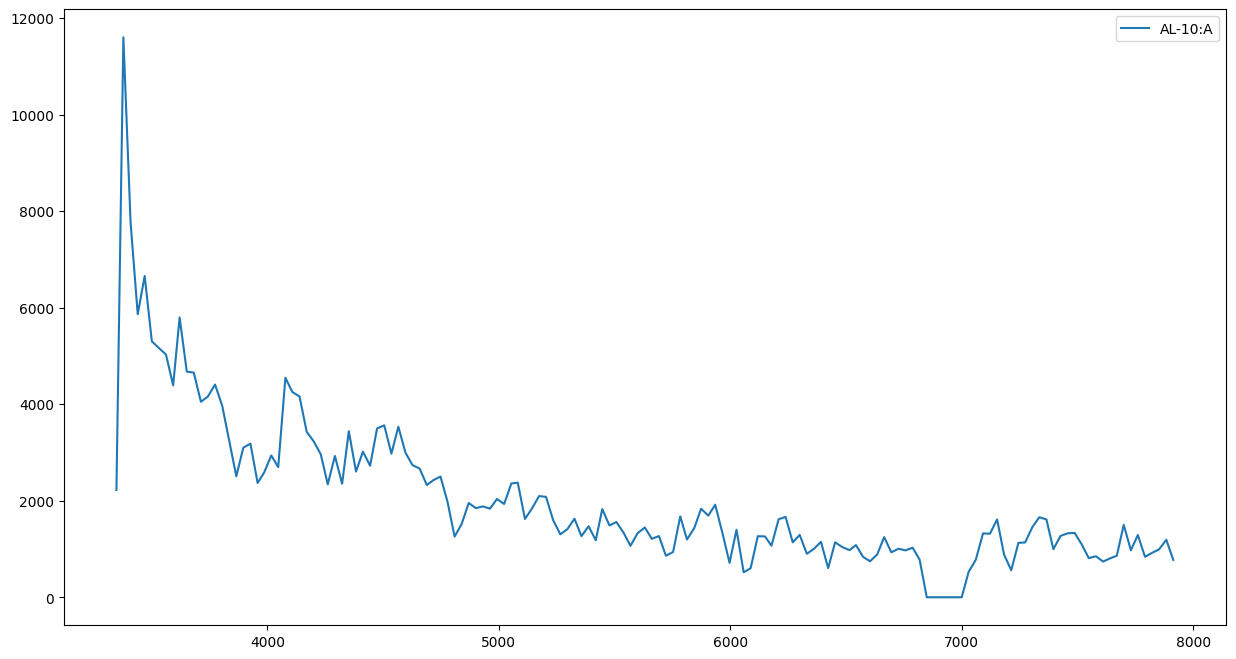

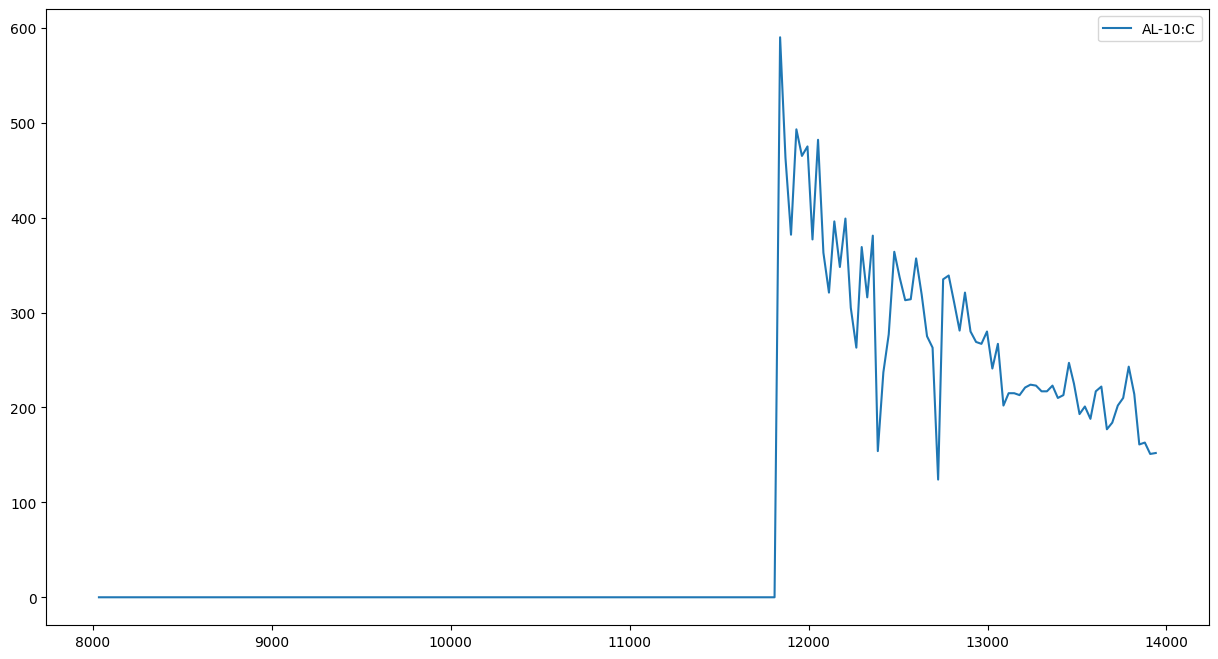

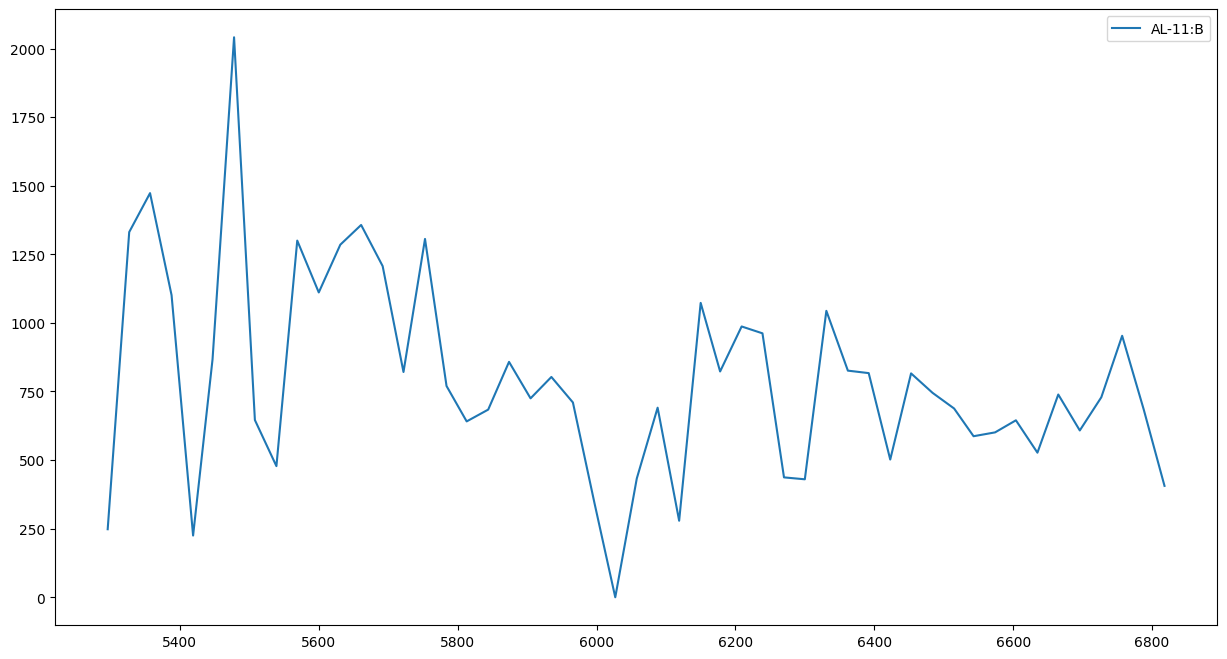

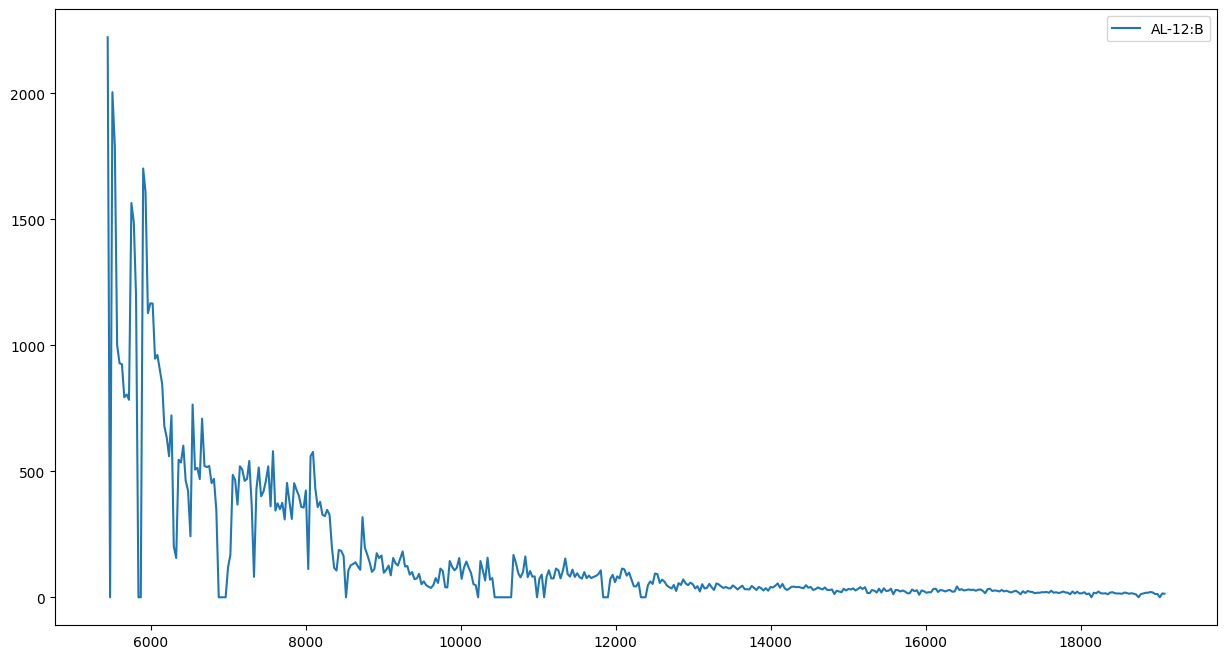

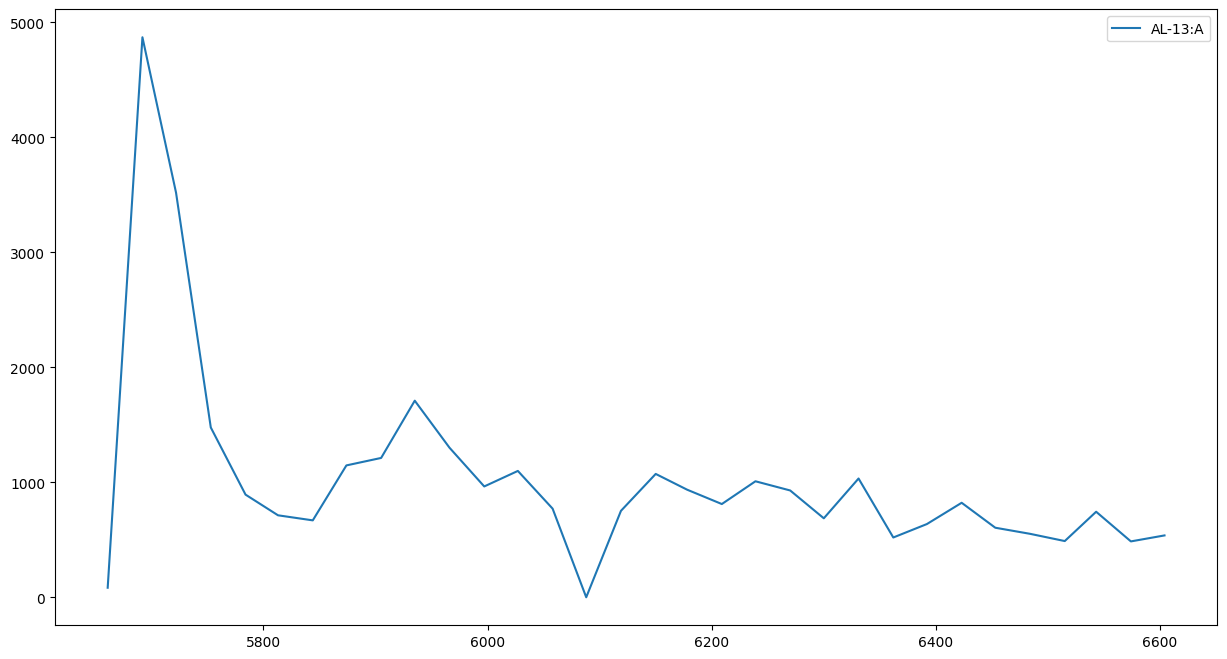

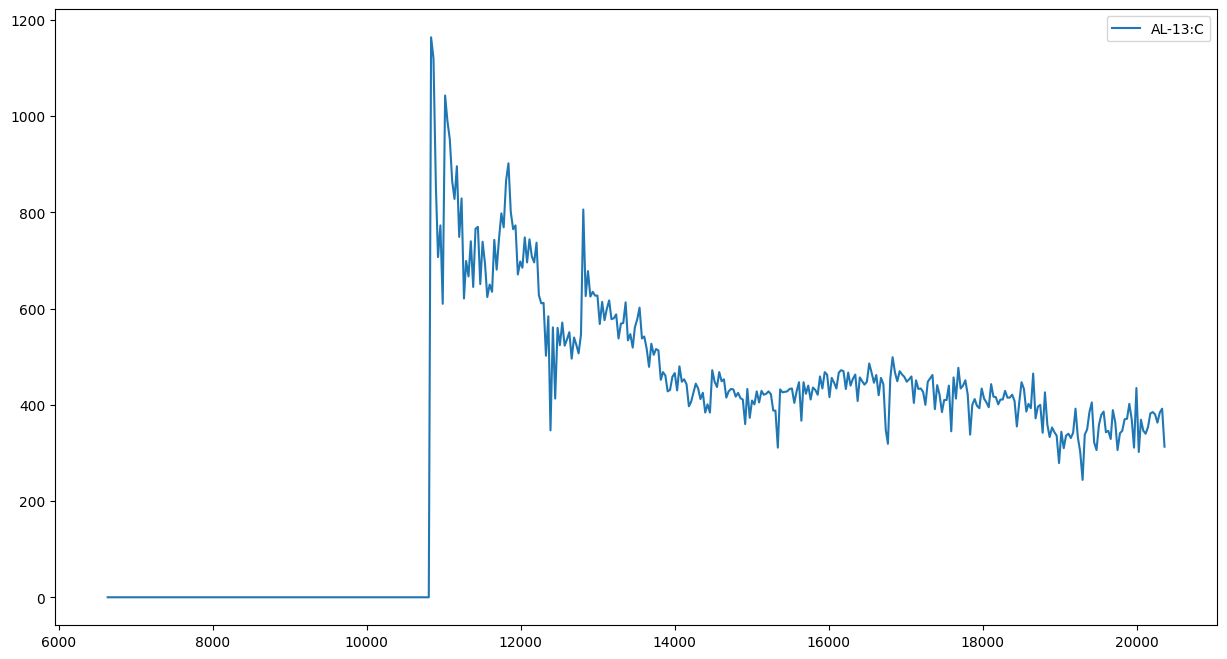

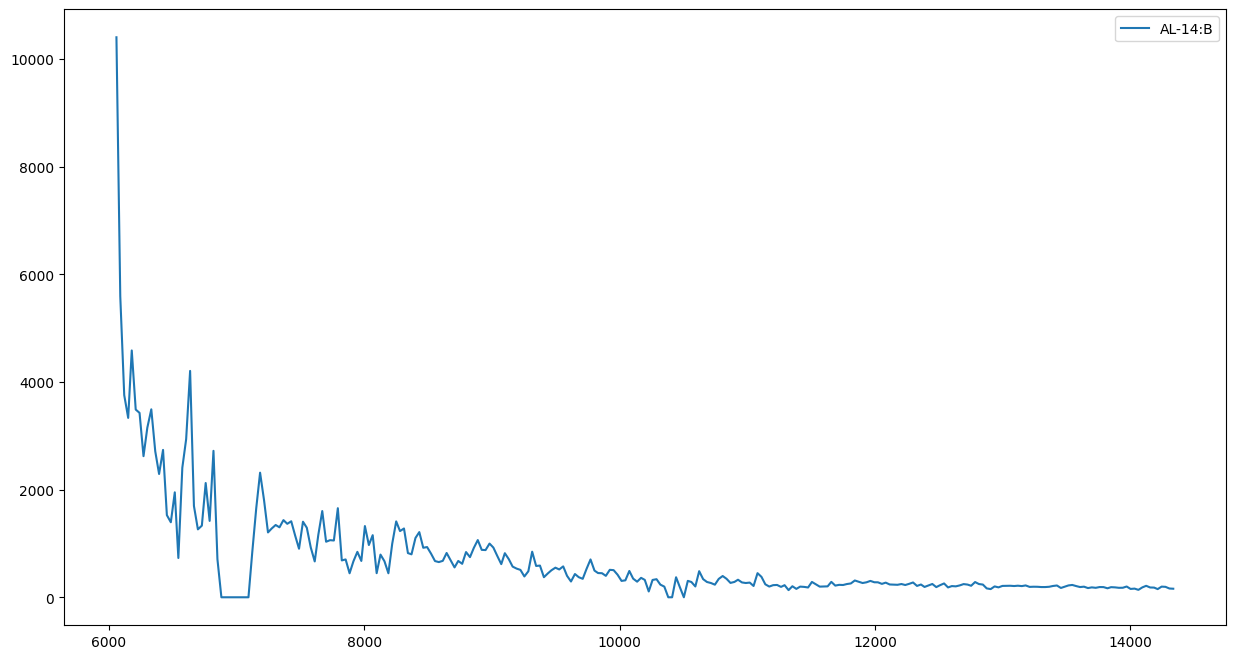

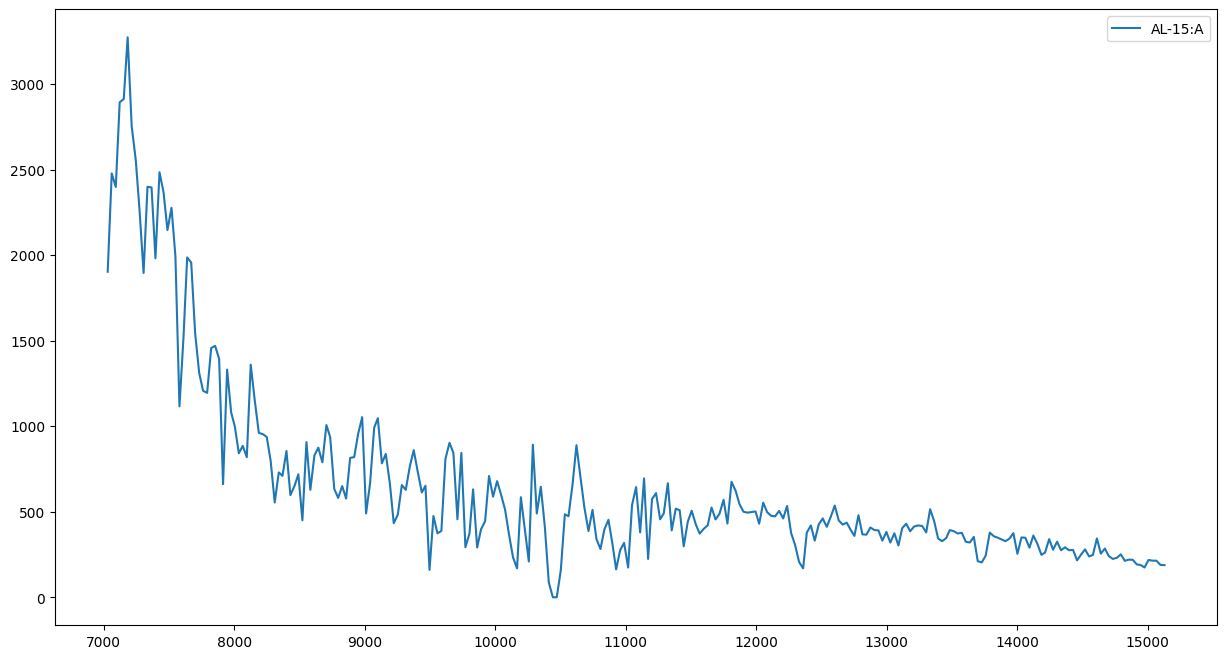

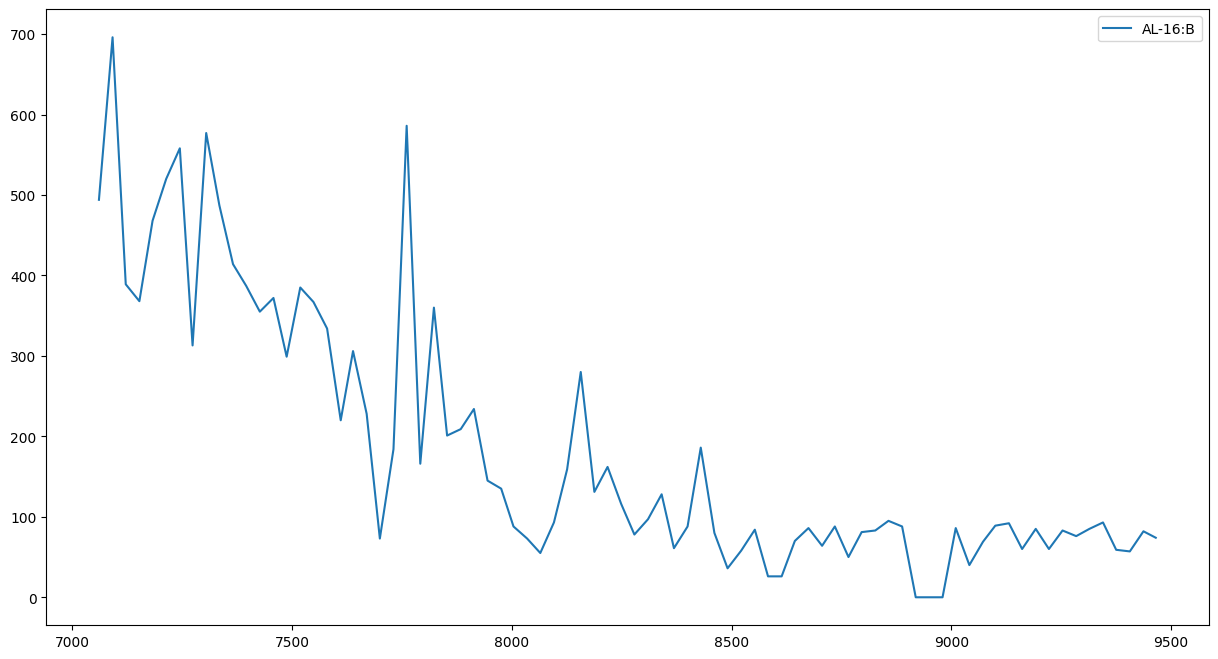

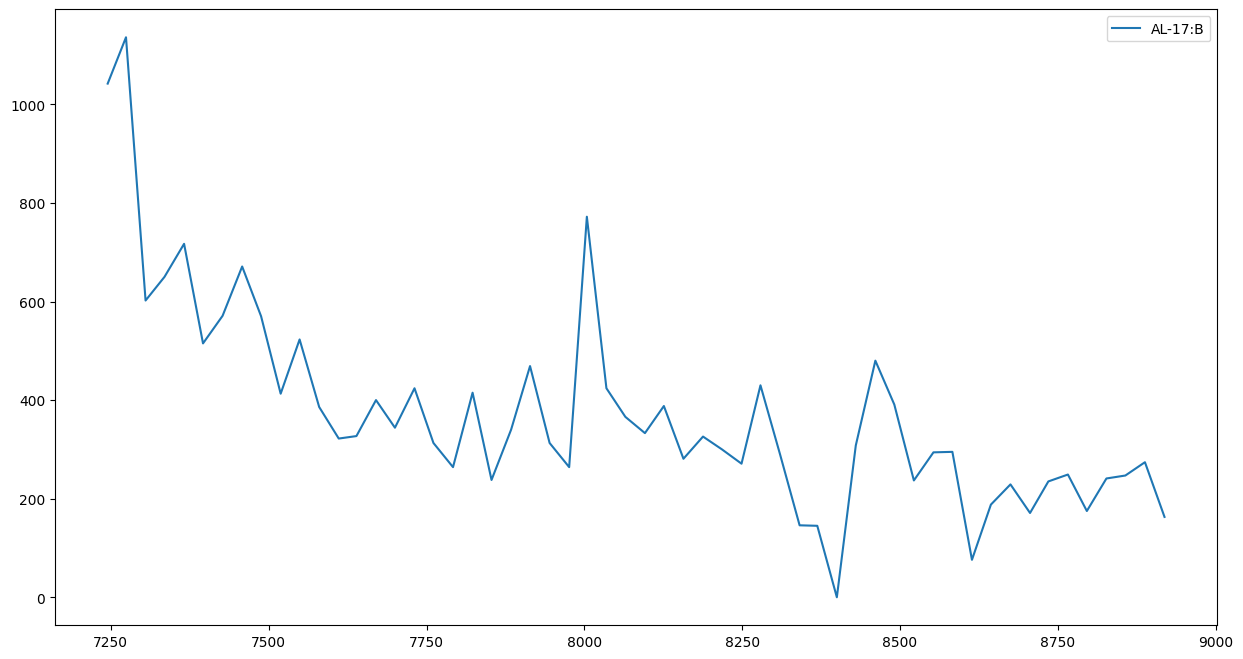

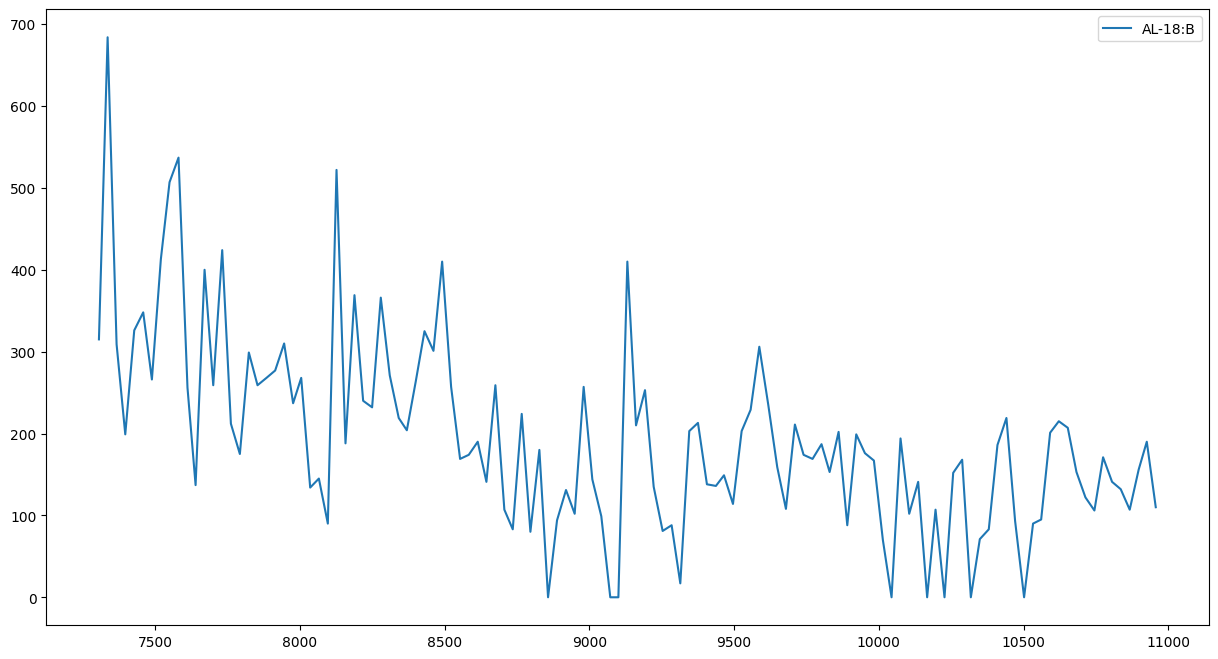

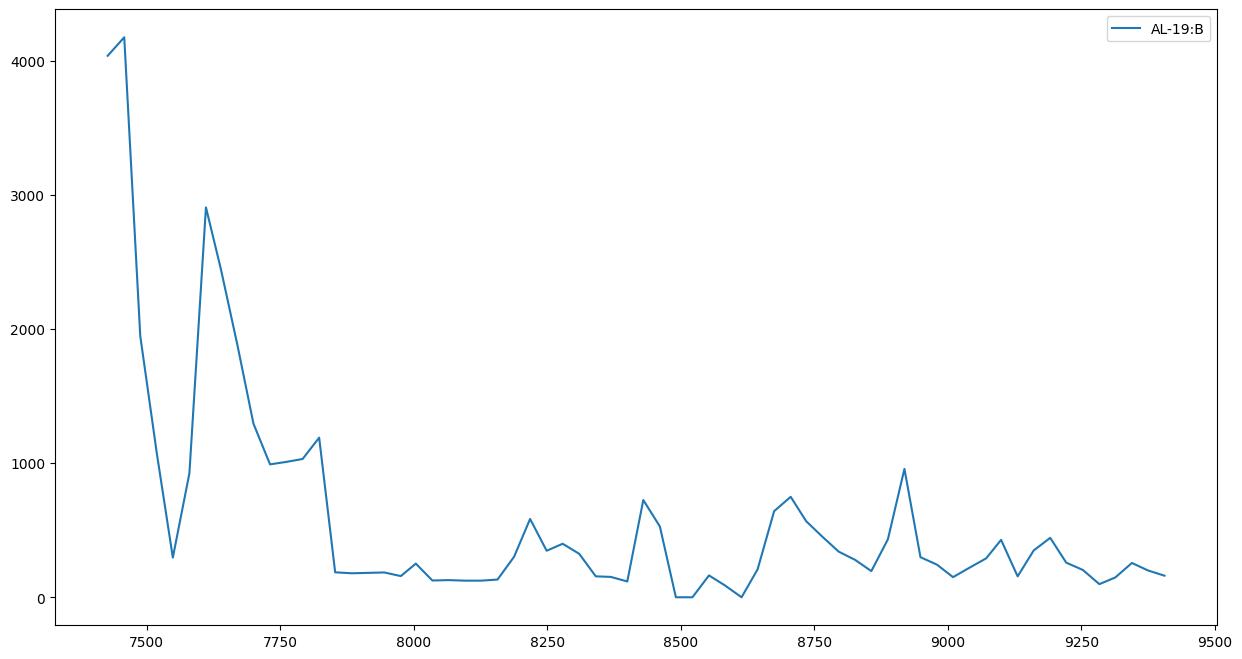

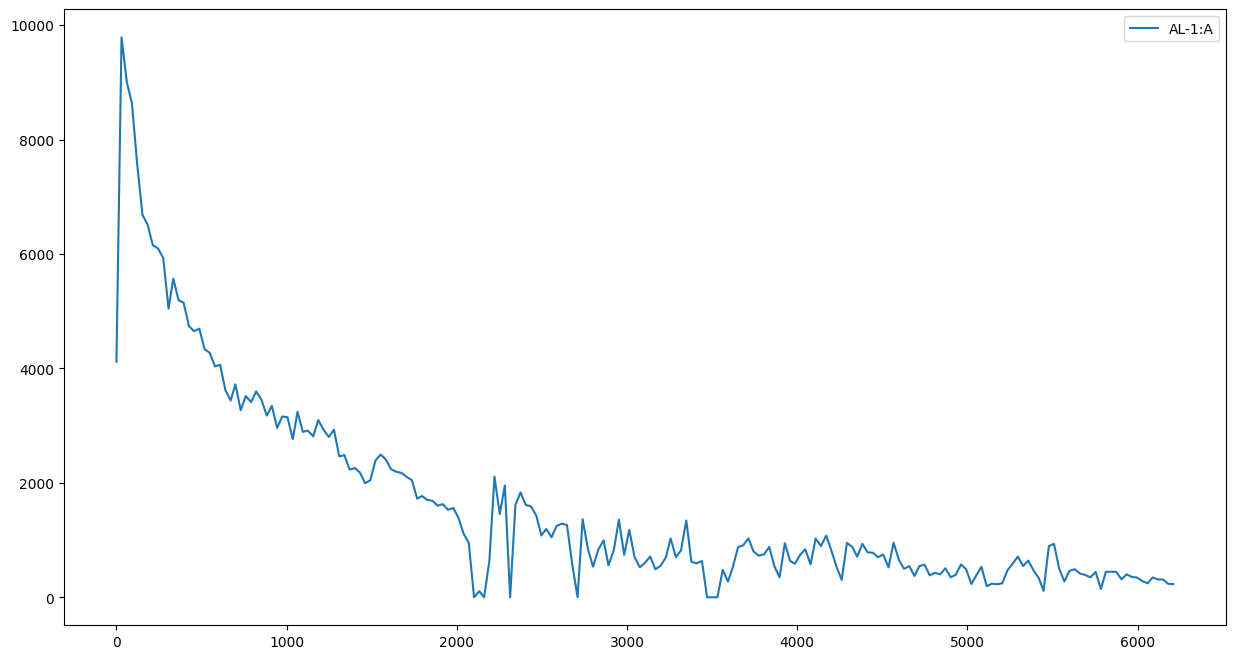

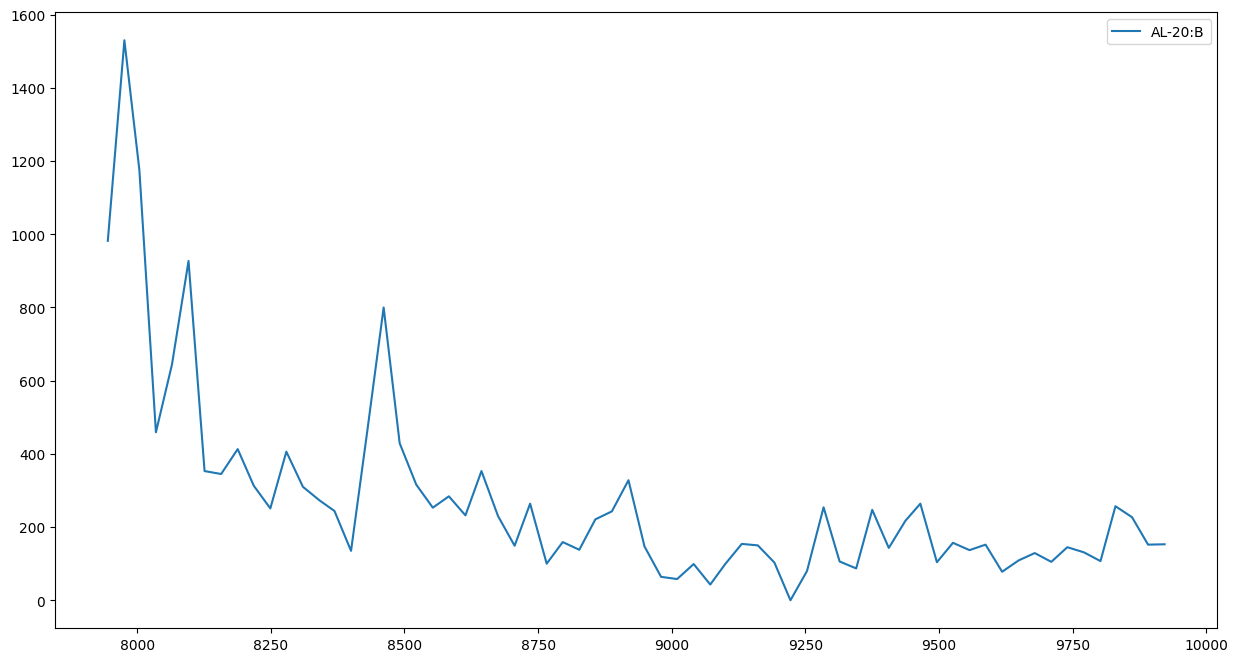

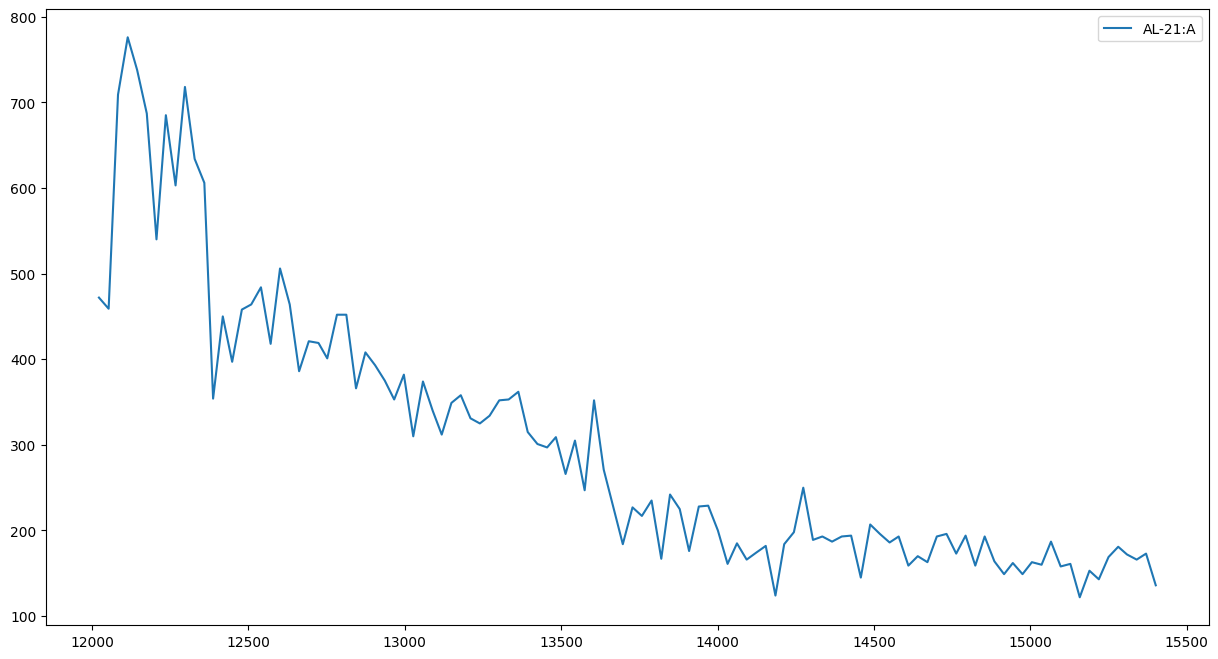

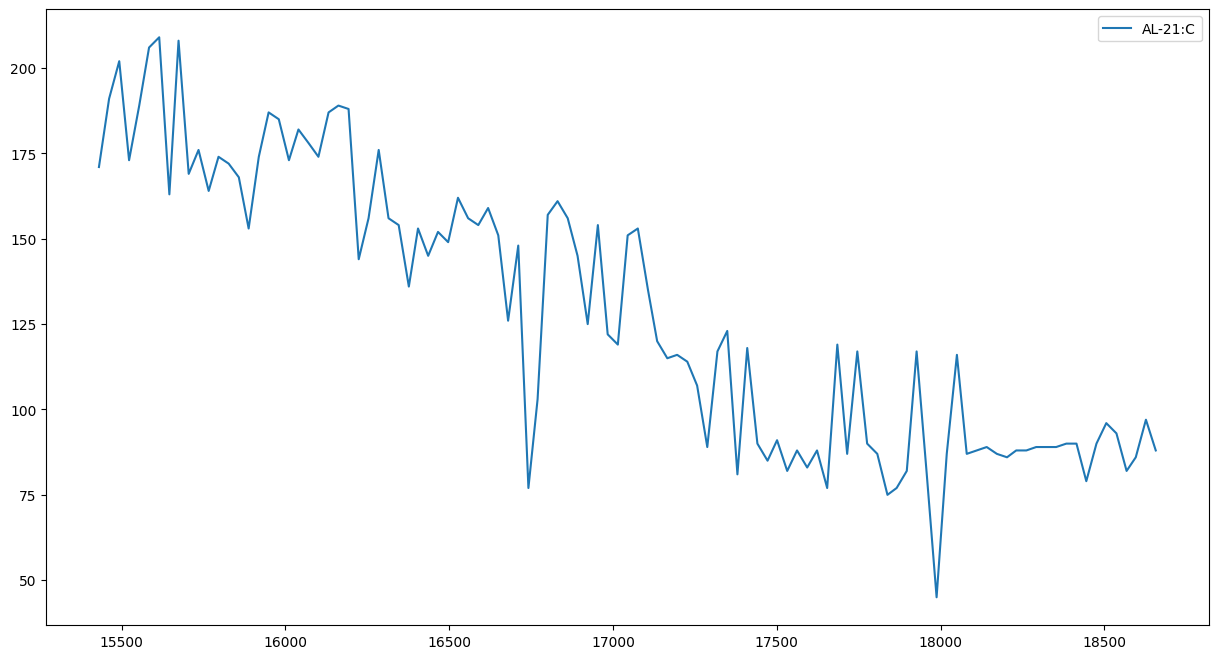

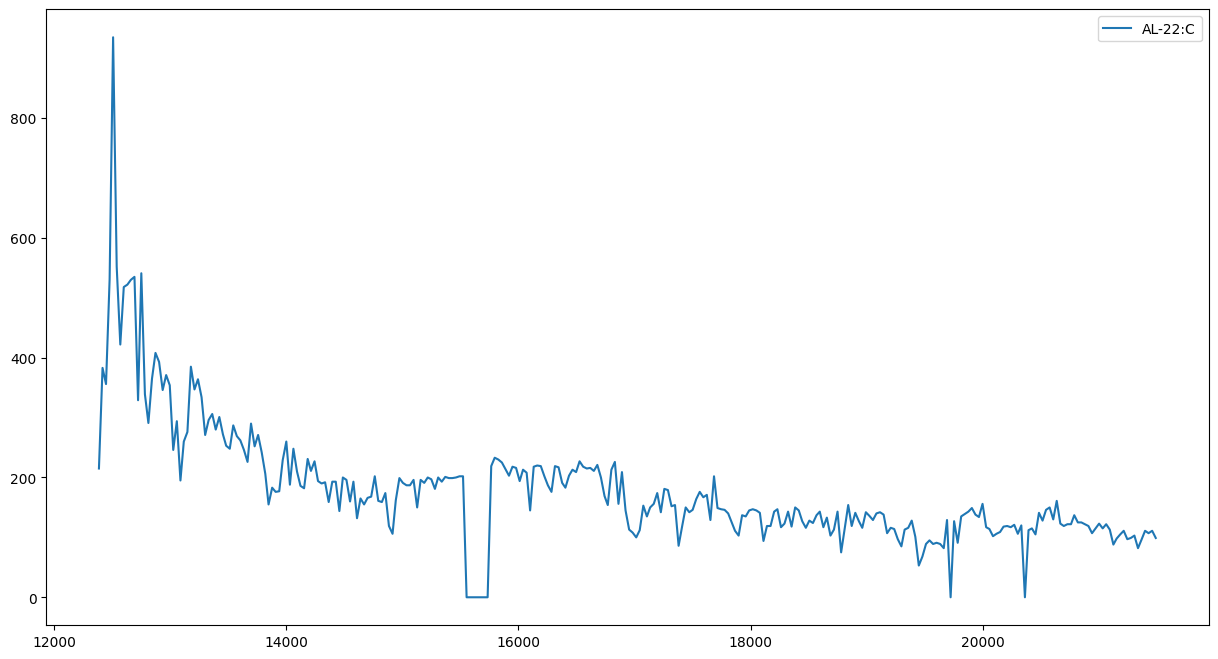

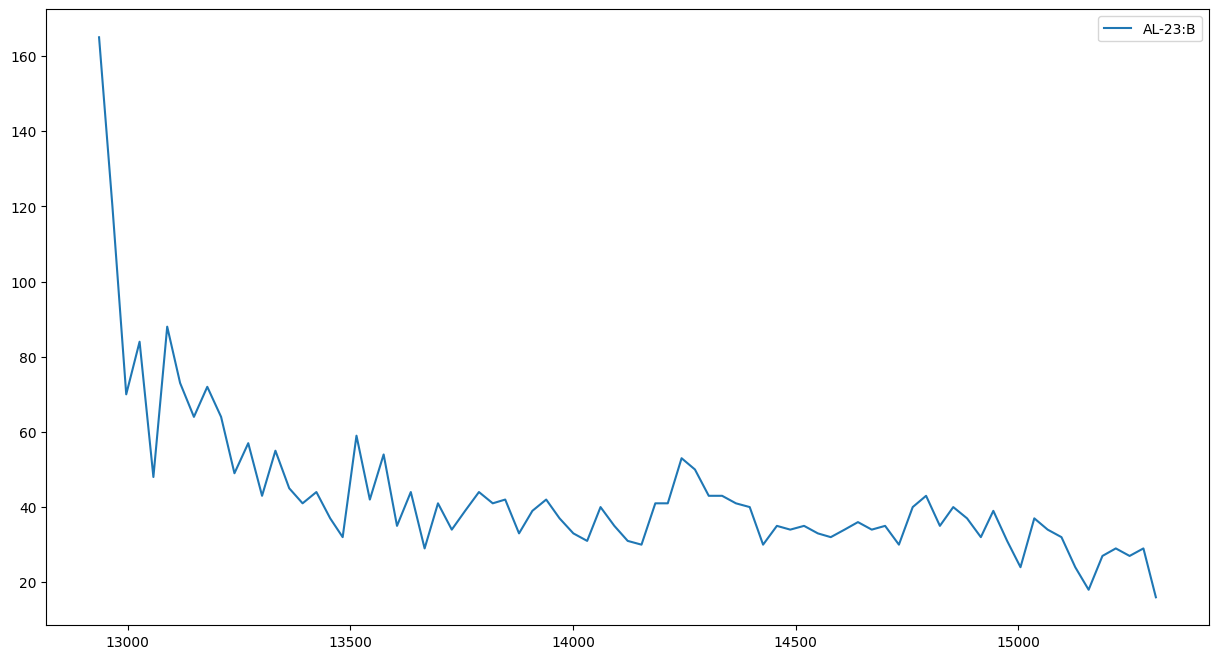

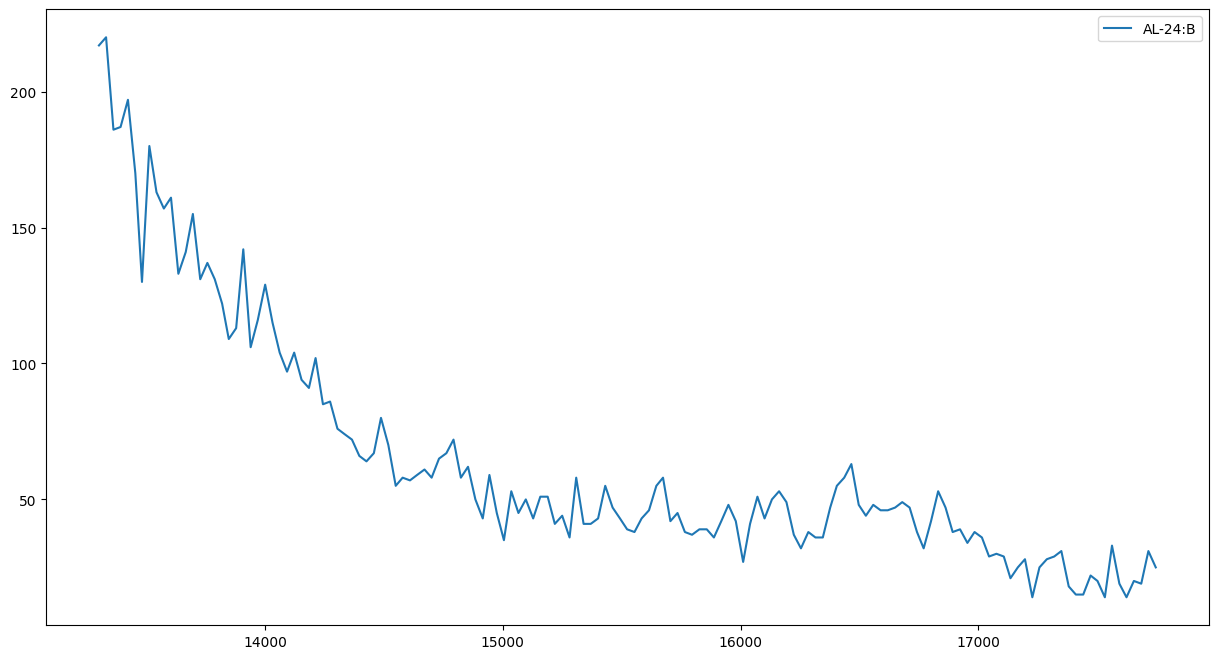

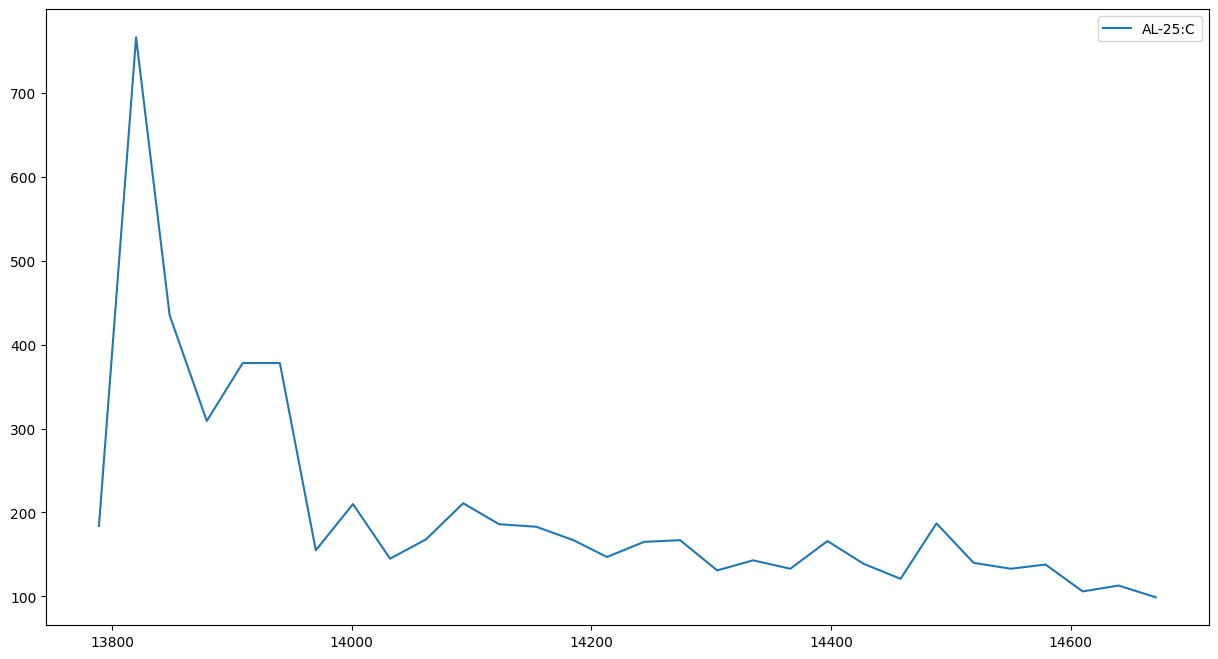

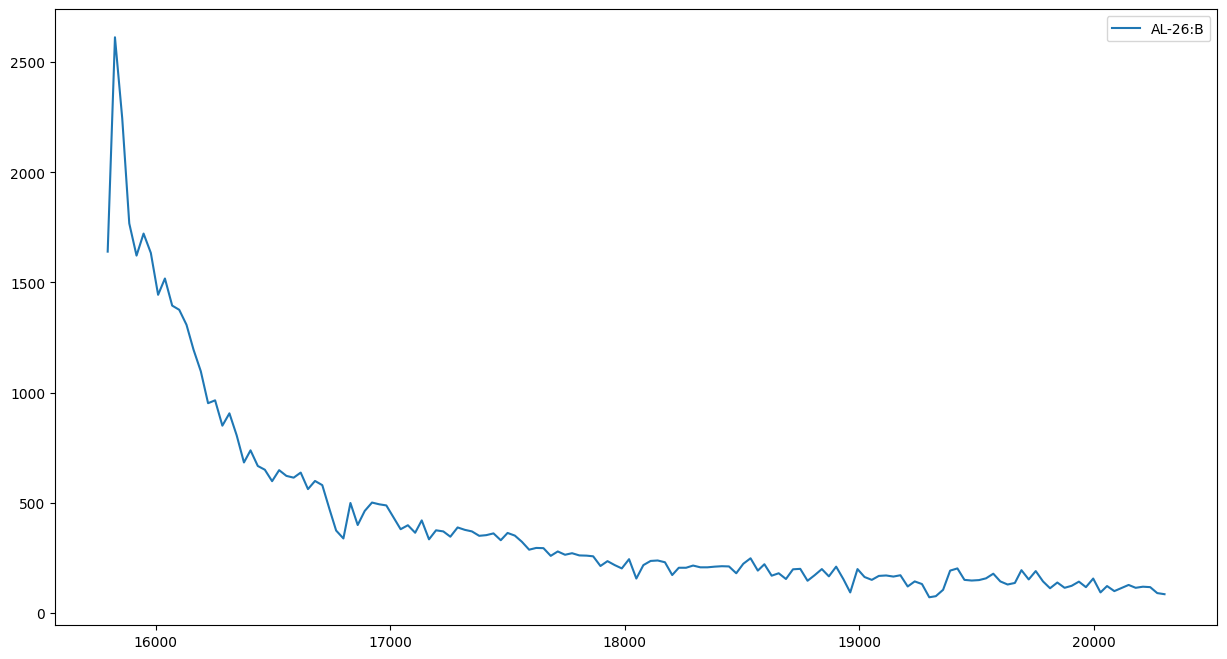

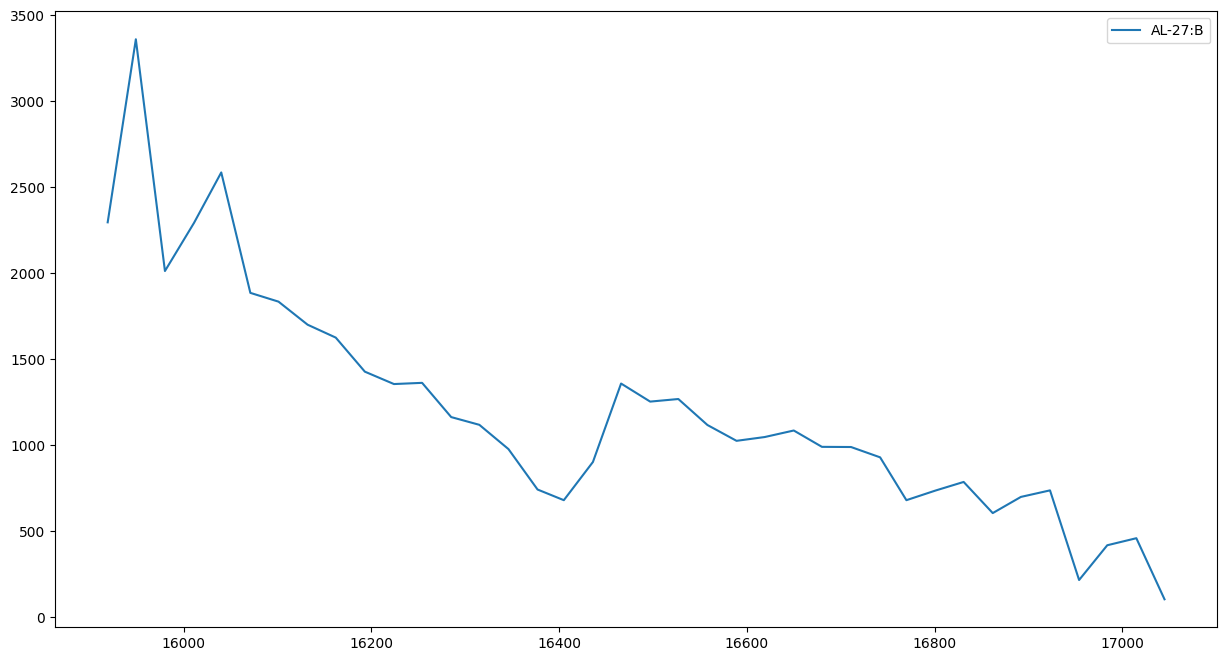

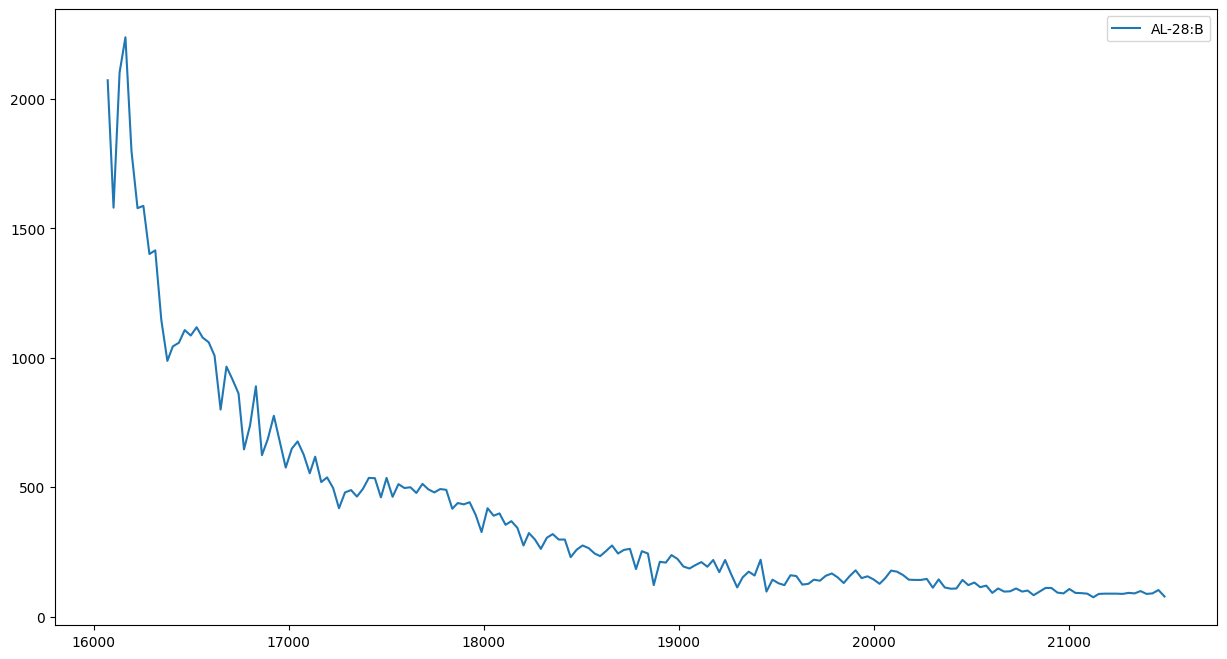

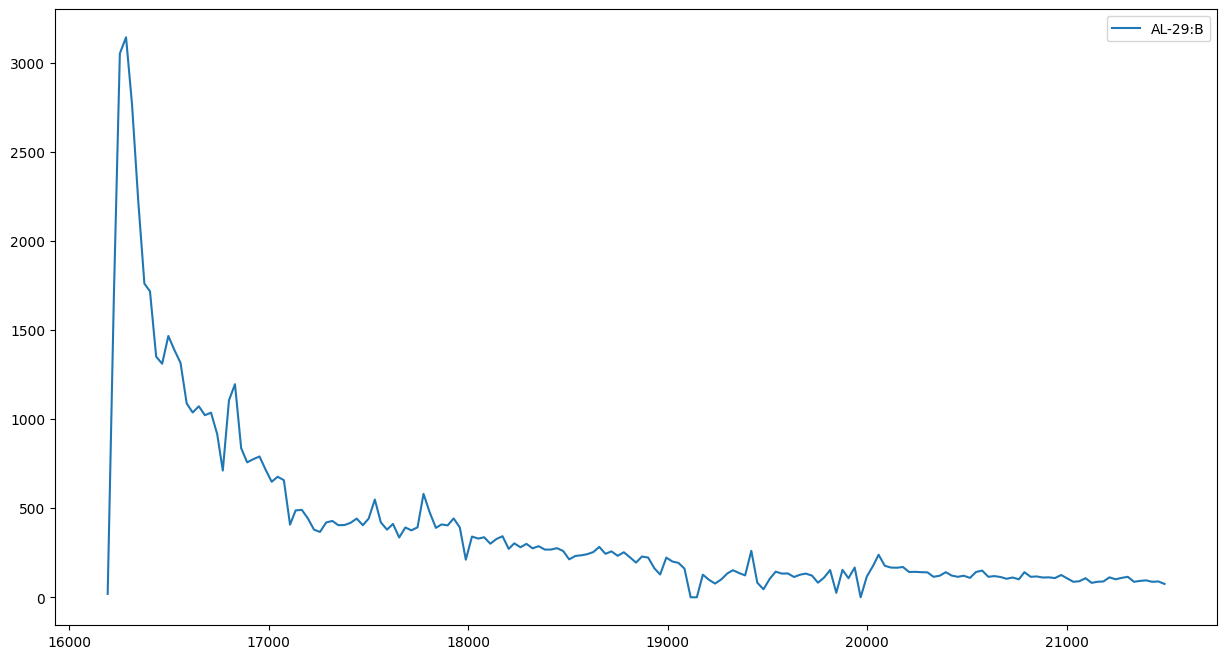

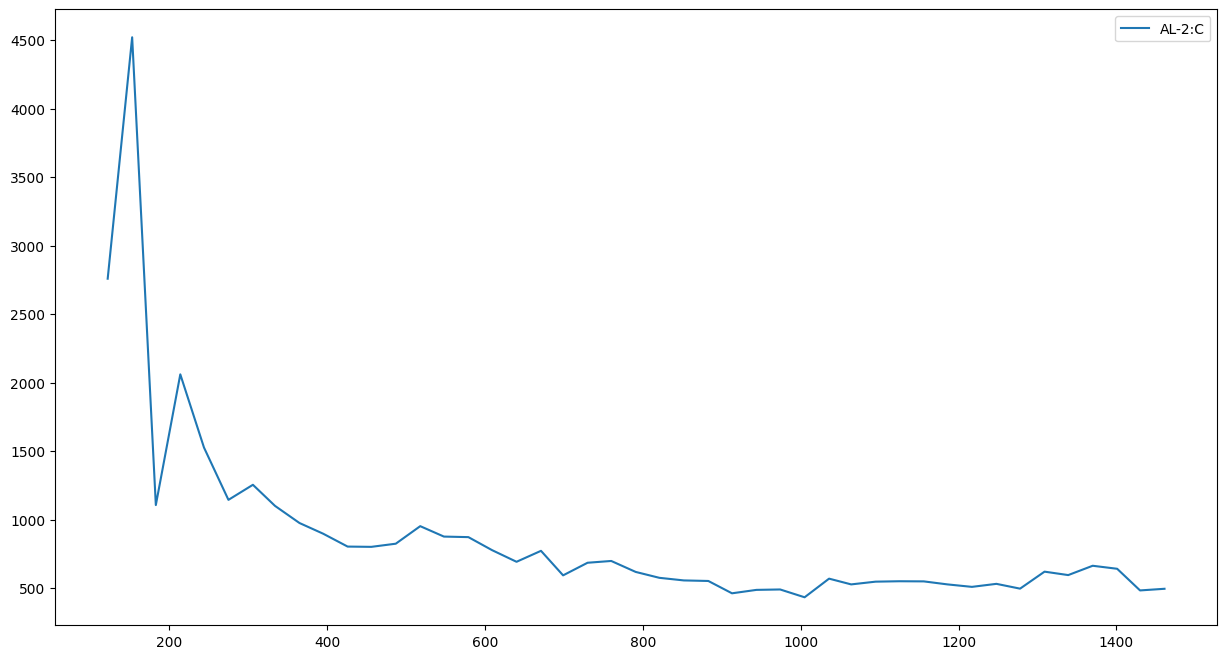

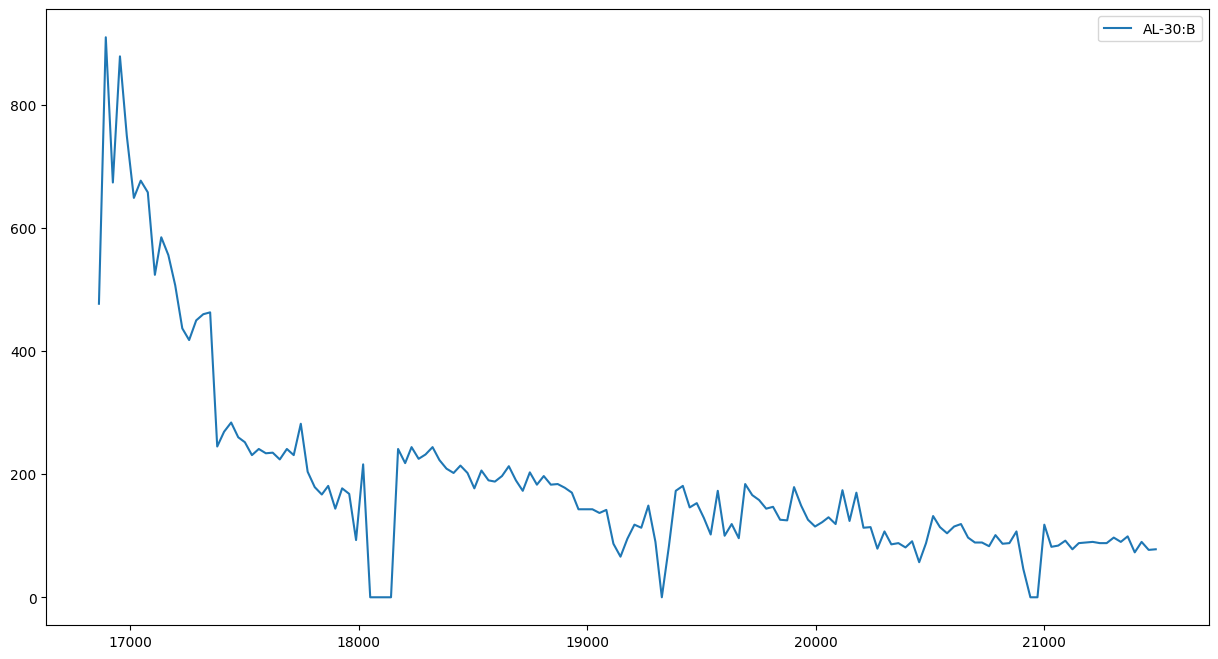

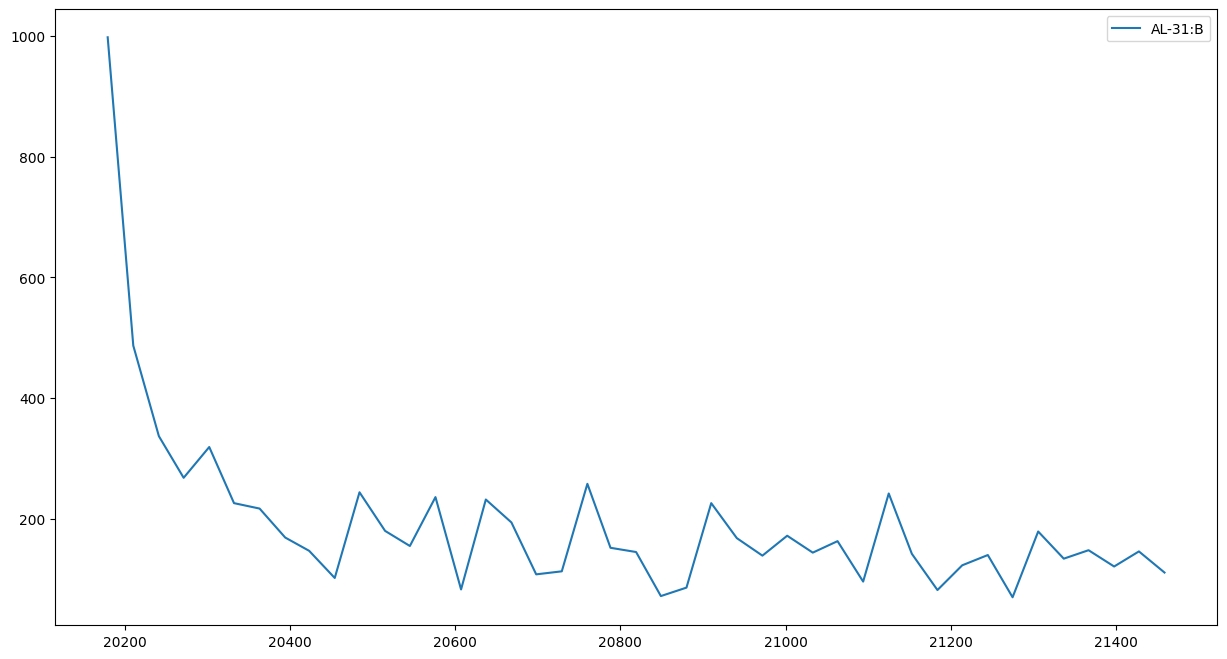

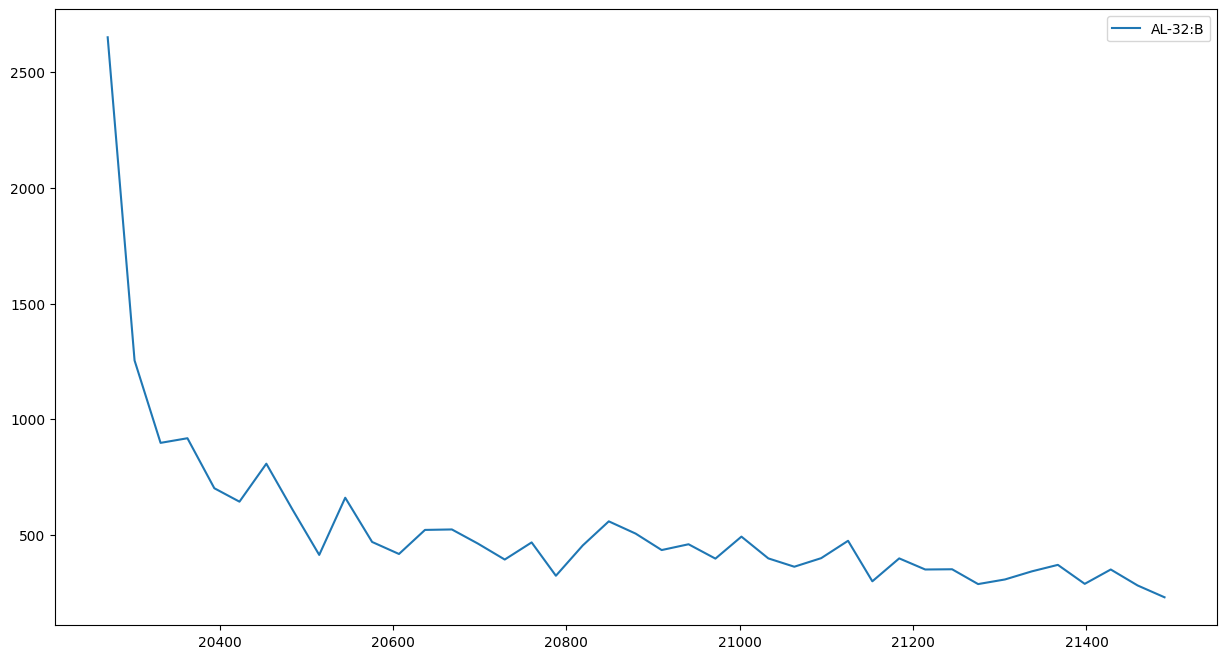

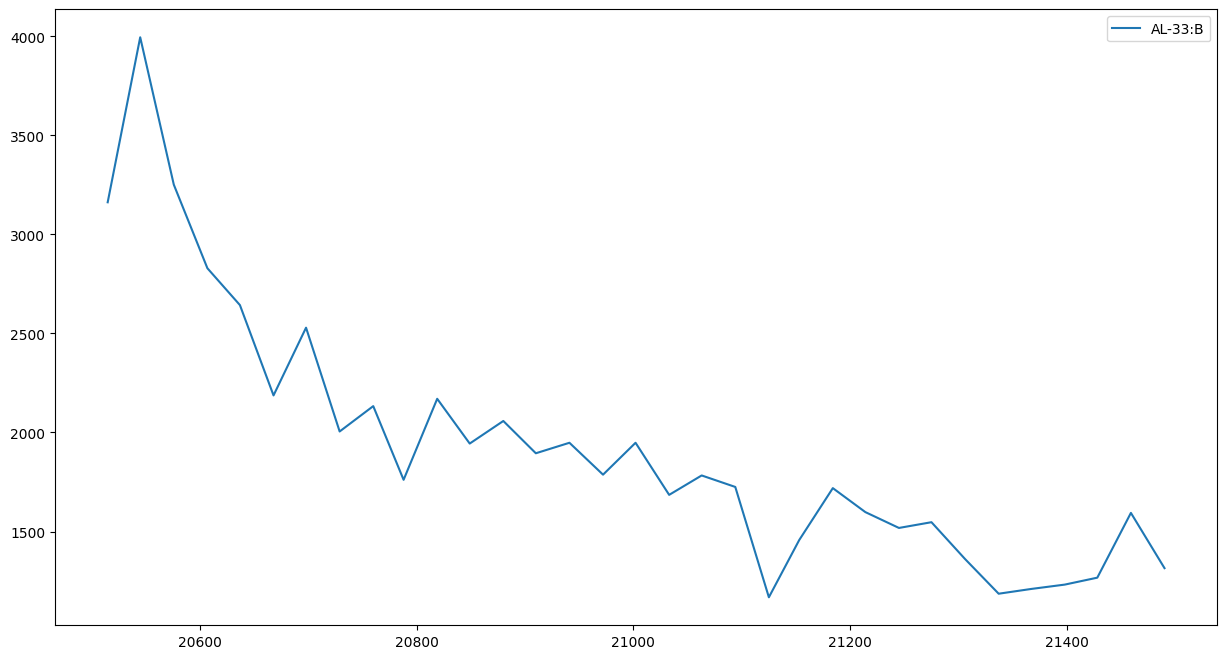

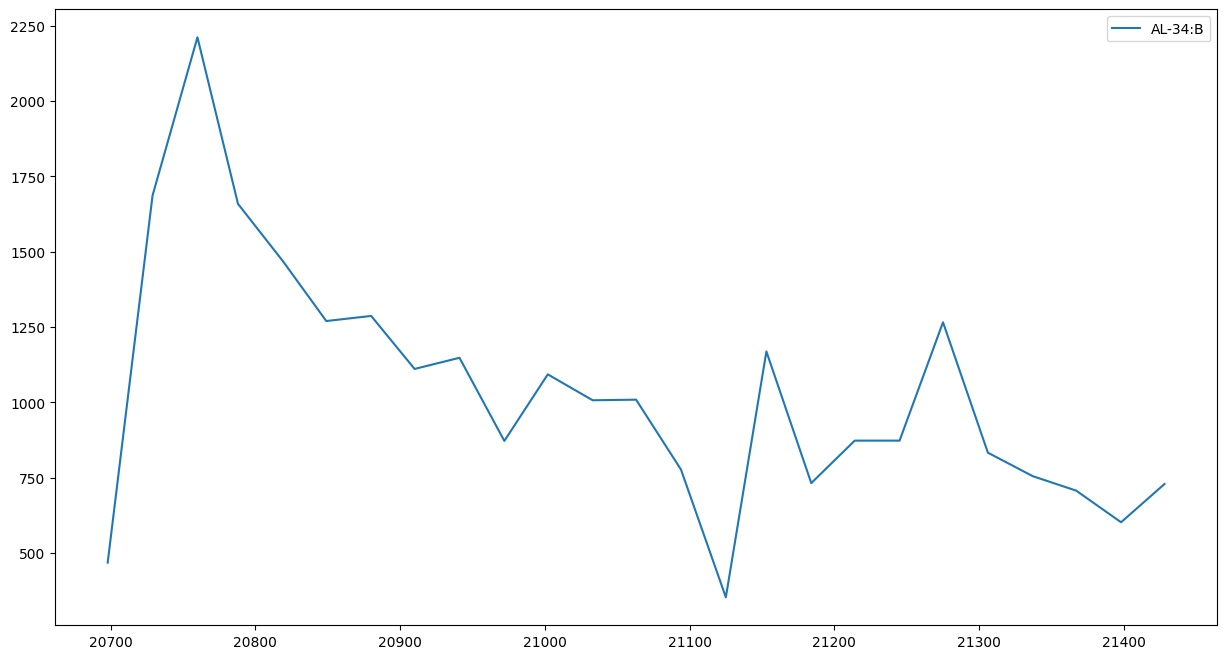

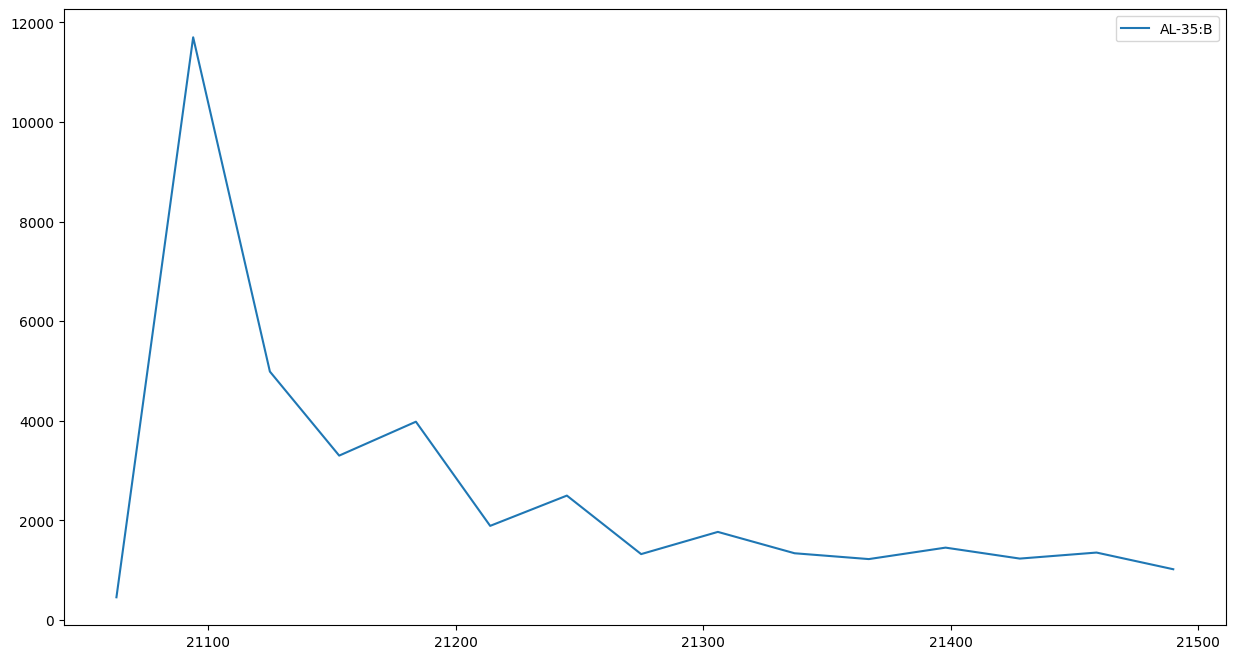

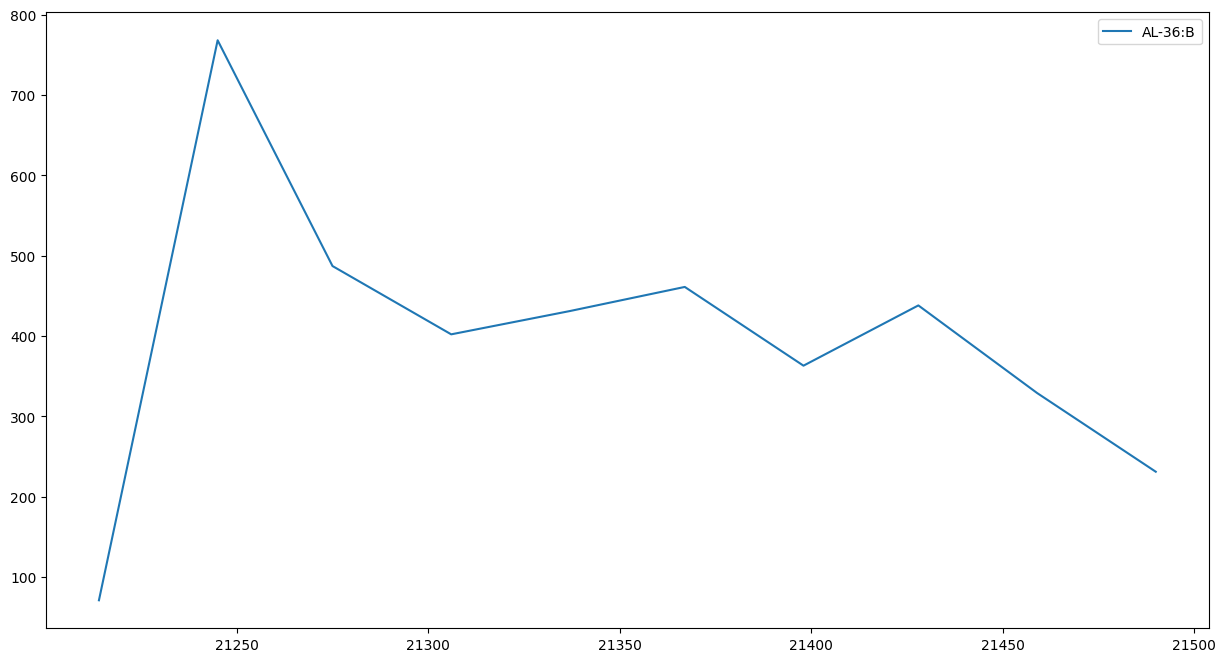

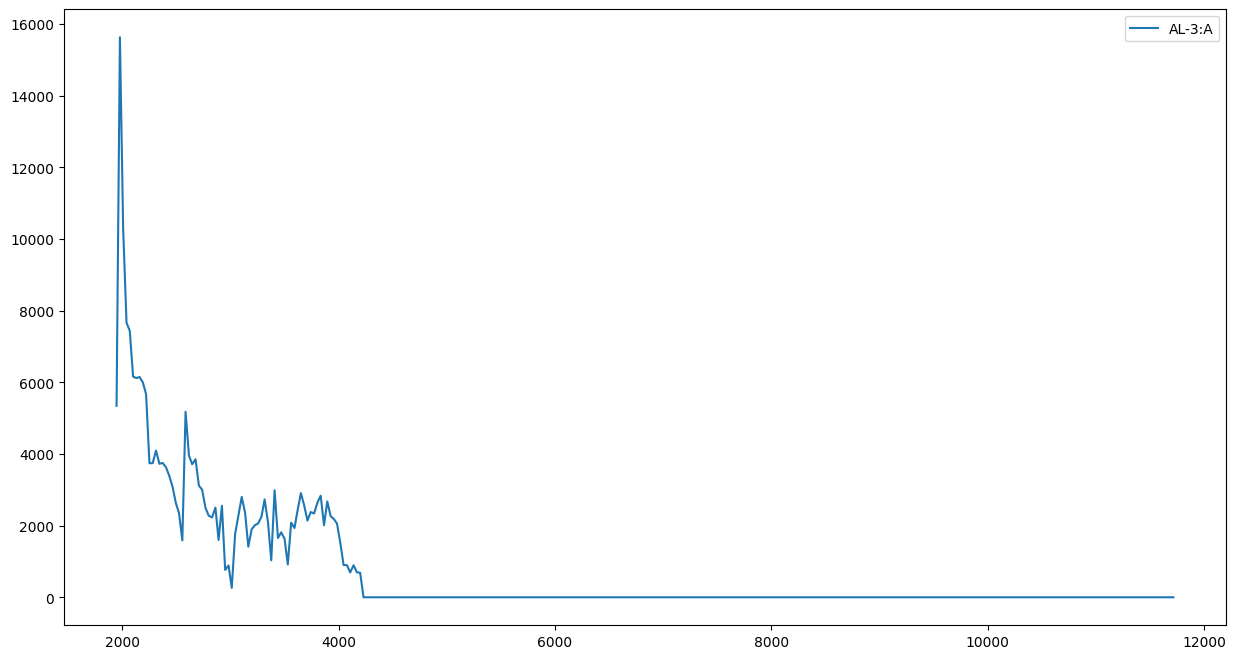

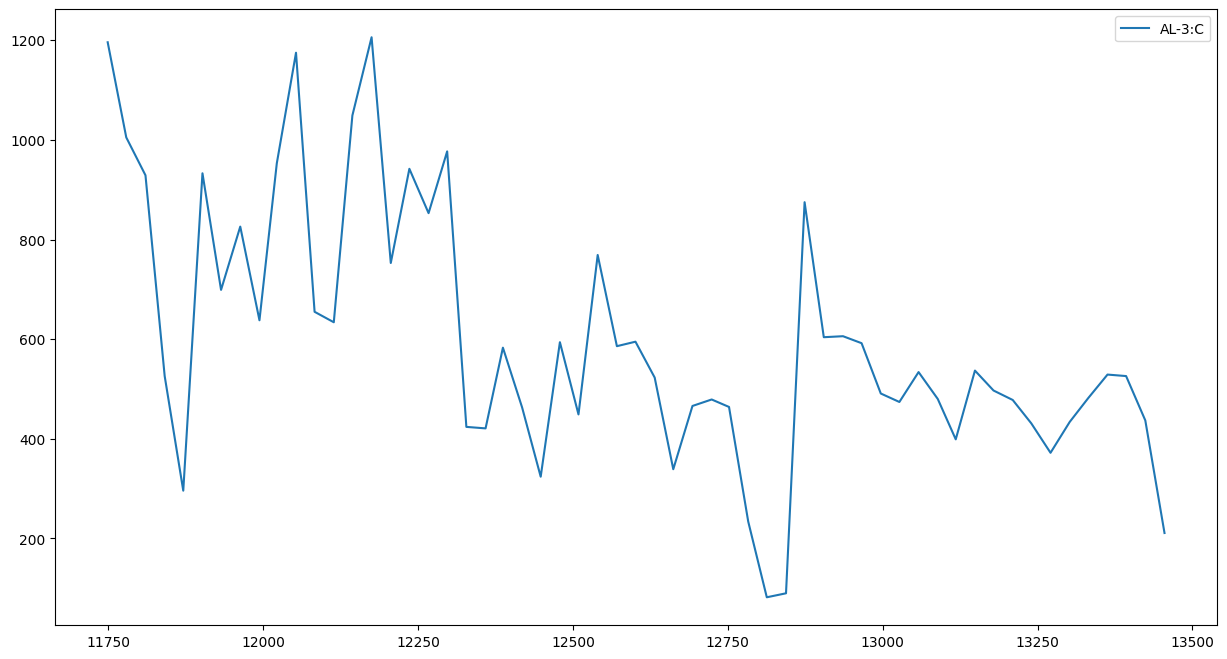

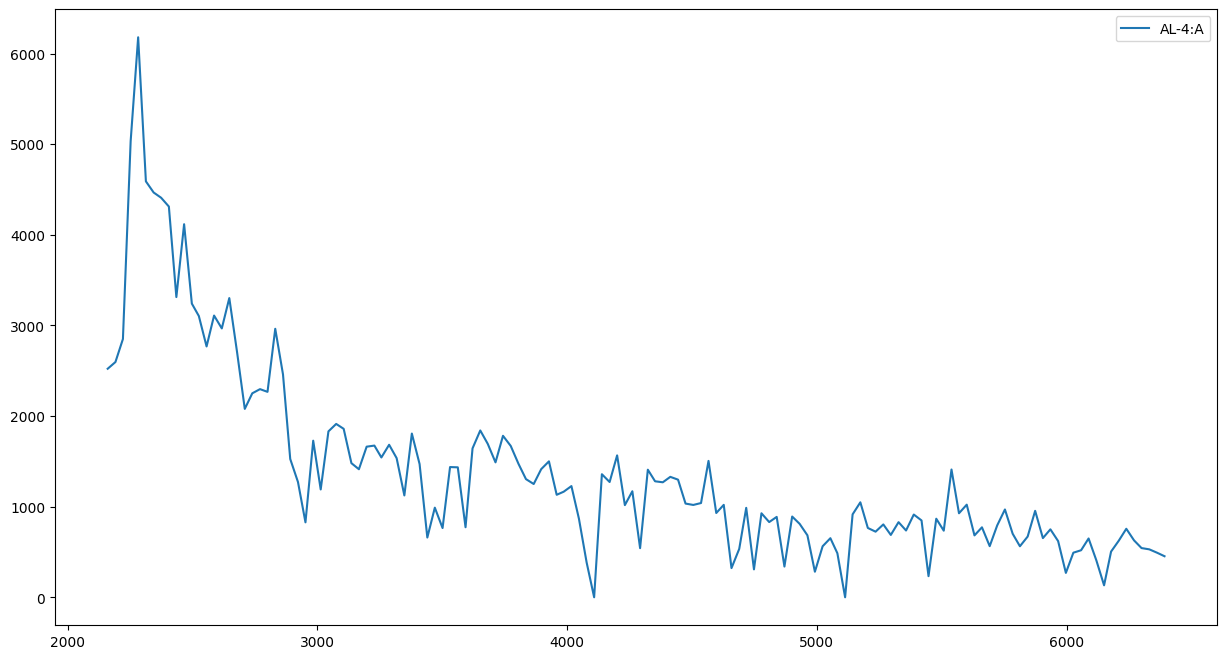

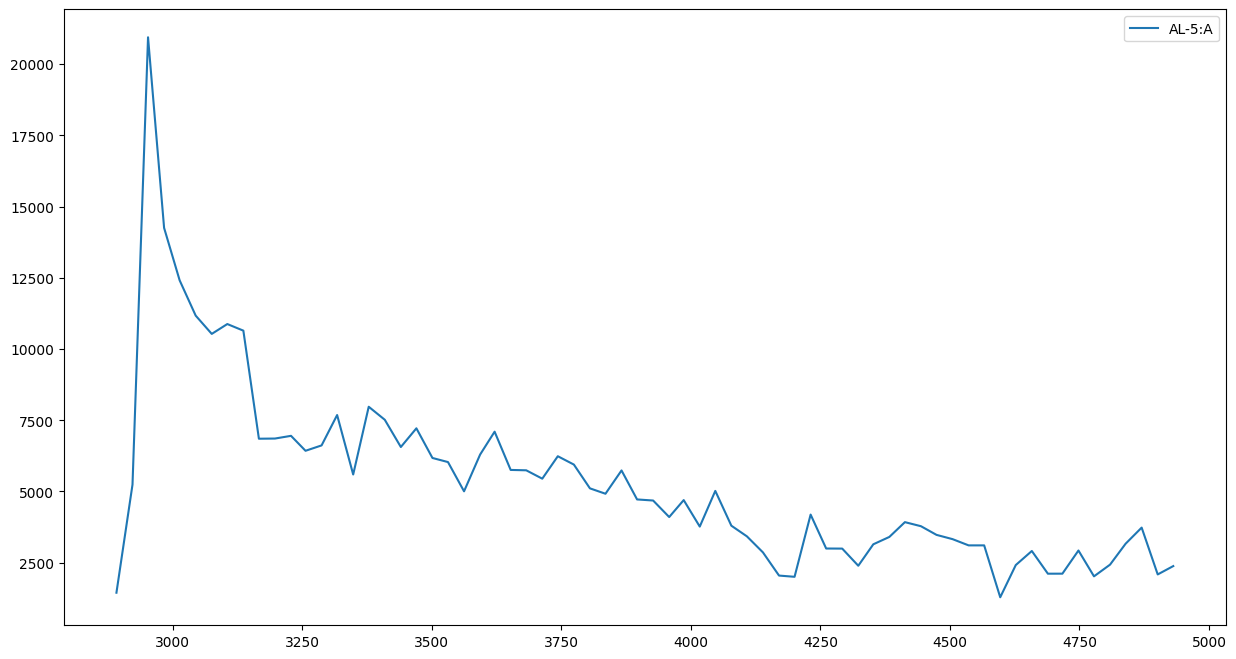

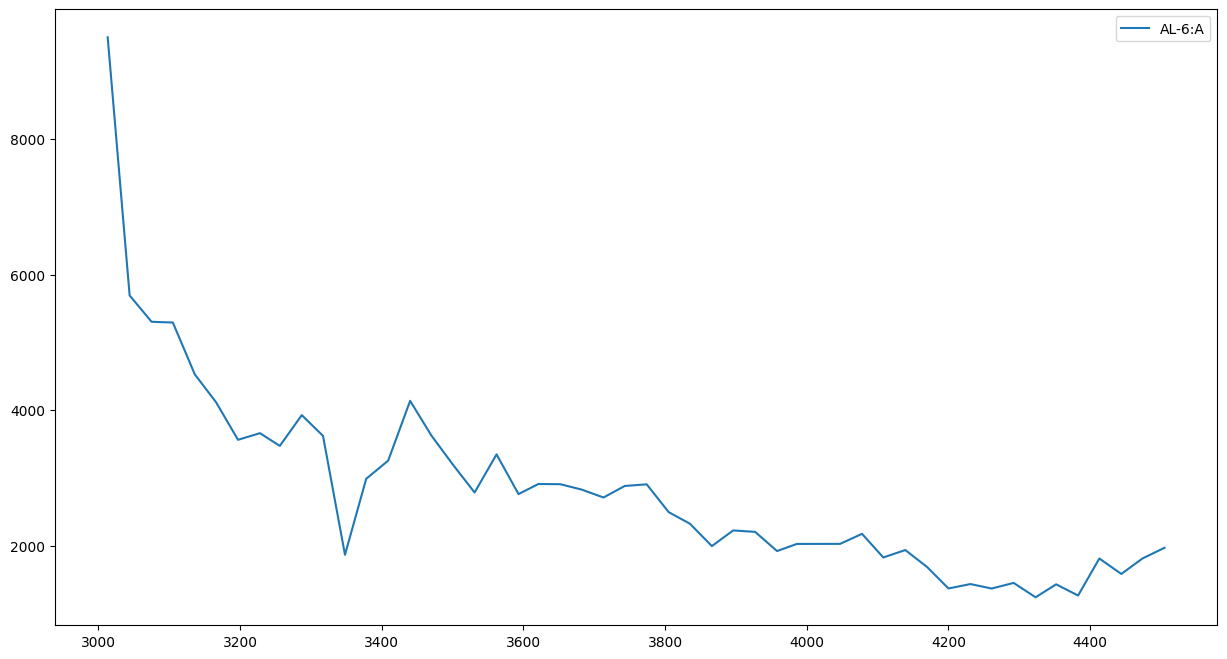

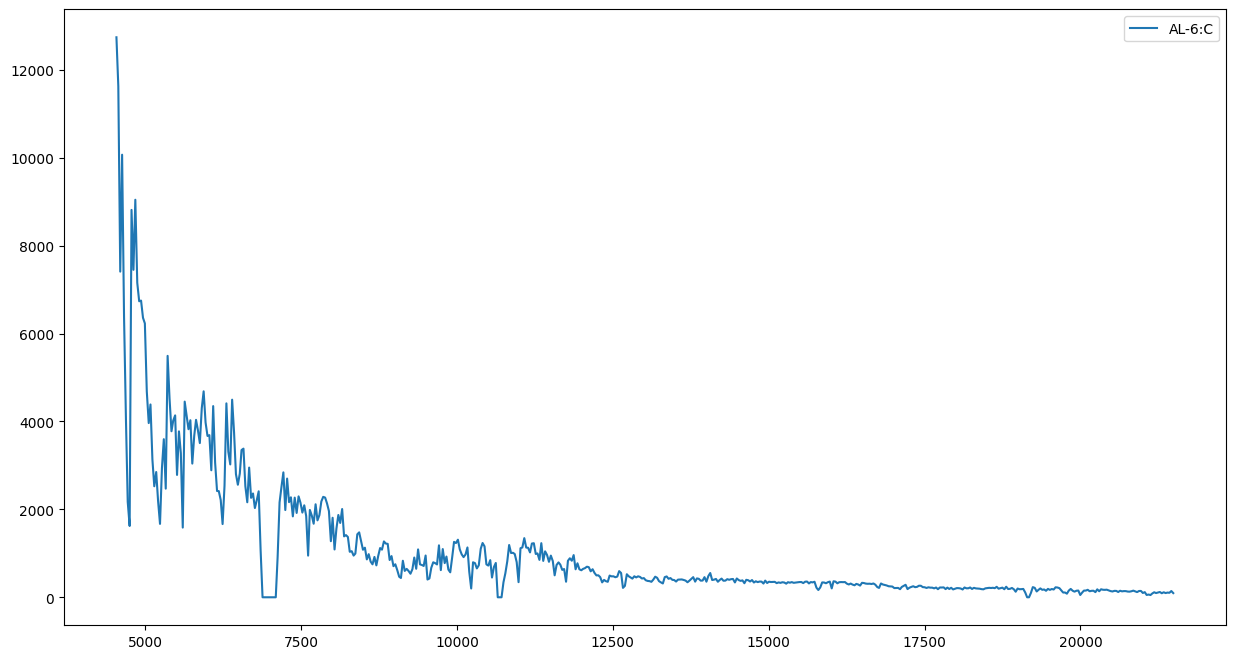

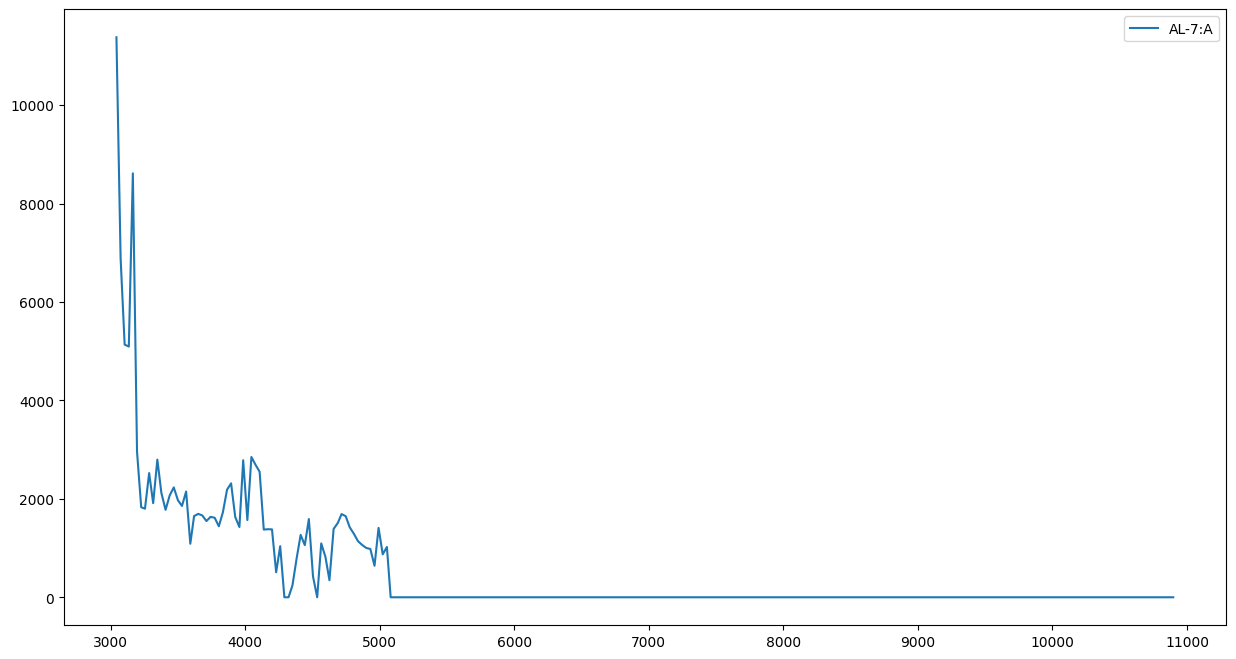

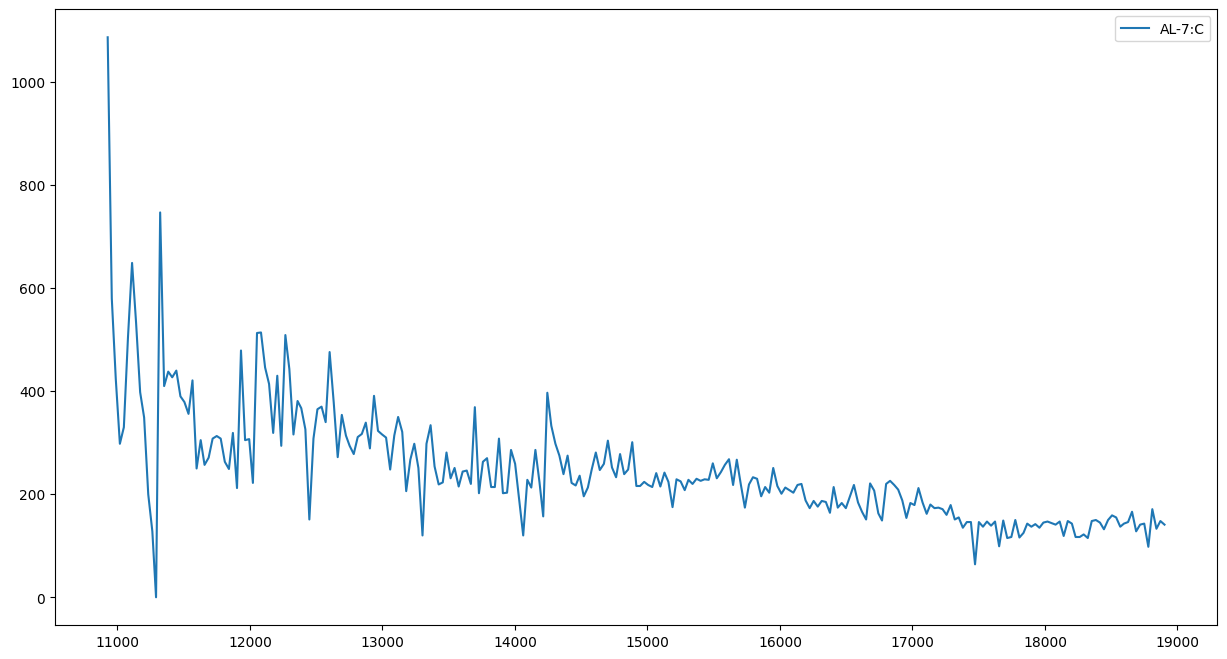

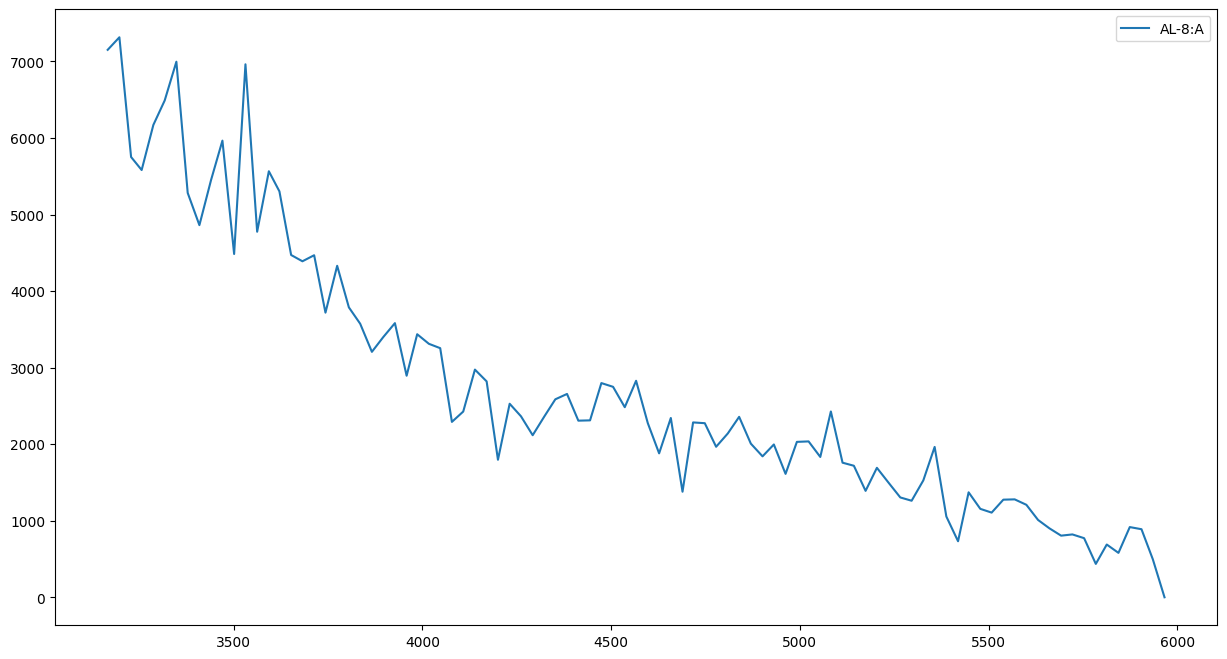

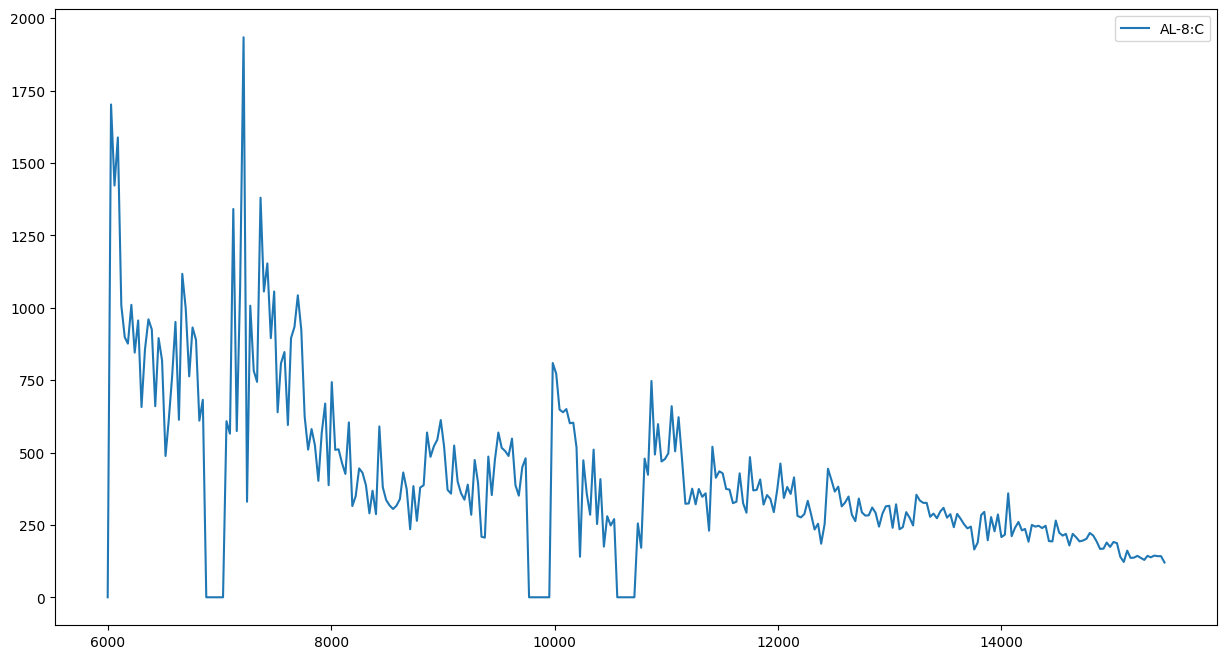

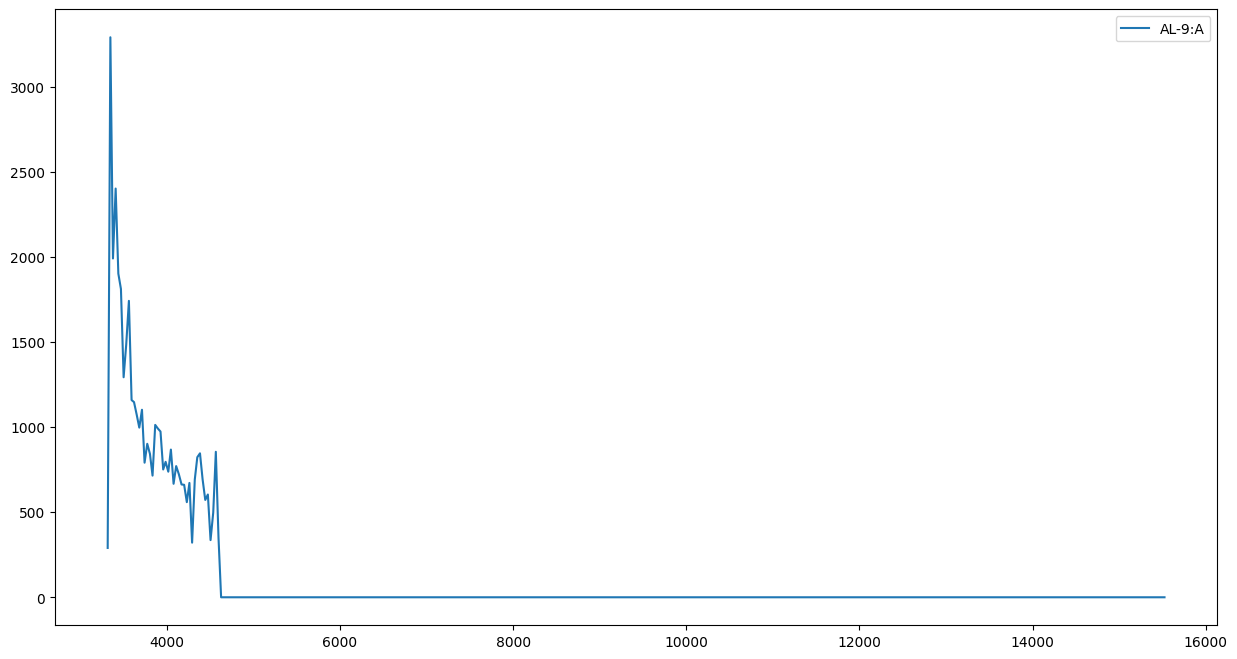

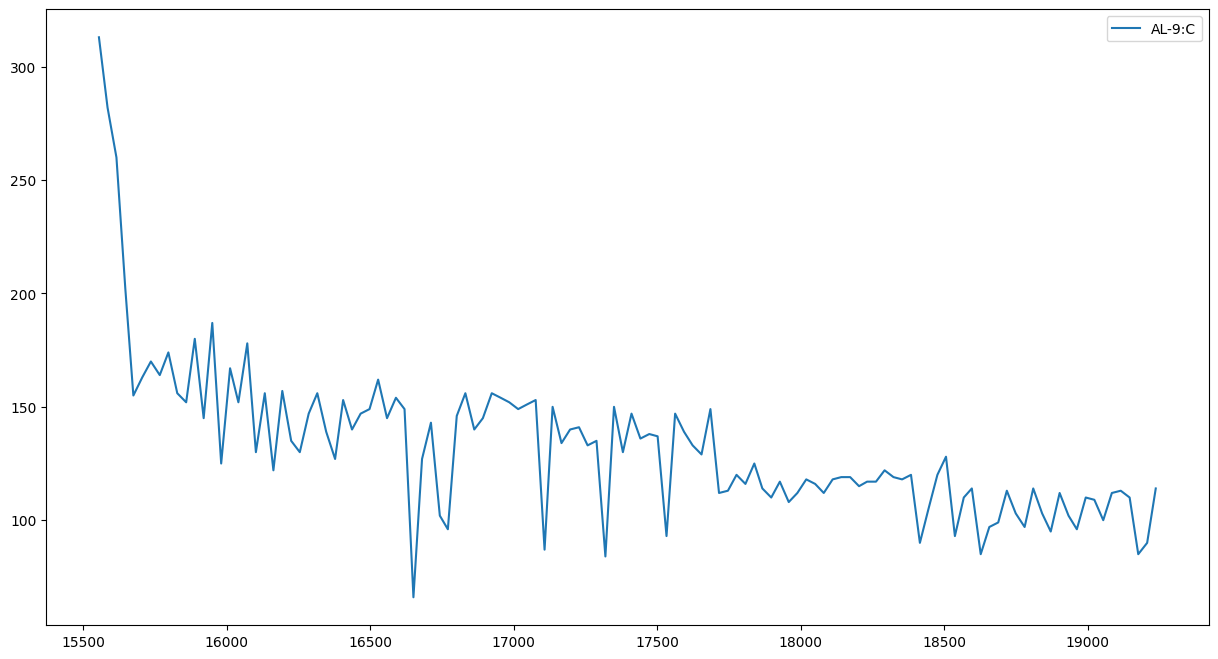

In [480]:
pozos = list(df.columns)
pozos = pozos[1:-1]
pozos
print(len(pozos))

for i, pozo in enumerate(pozos):
    plt.figure(figsize=(15,8))
    plt.plot(df['tiempo en dias'], df[pozo], label=pozo)
    plt.legend()
    plt.show()

In [379]:
welluniq = prodwellSemMissings['Completion'].unique()
#list(rodwellSemMissings.Completion)
pozos = list(welluniq)
print(type(pozos))

<class 'list'>


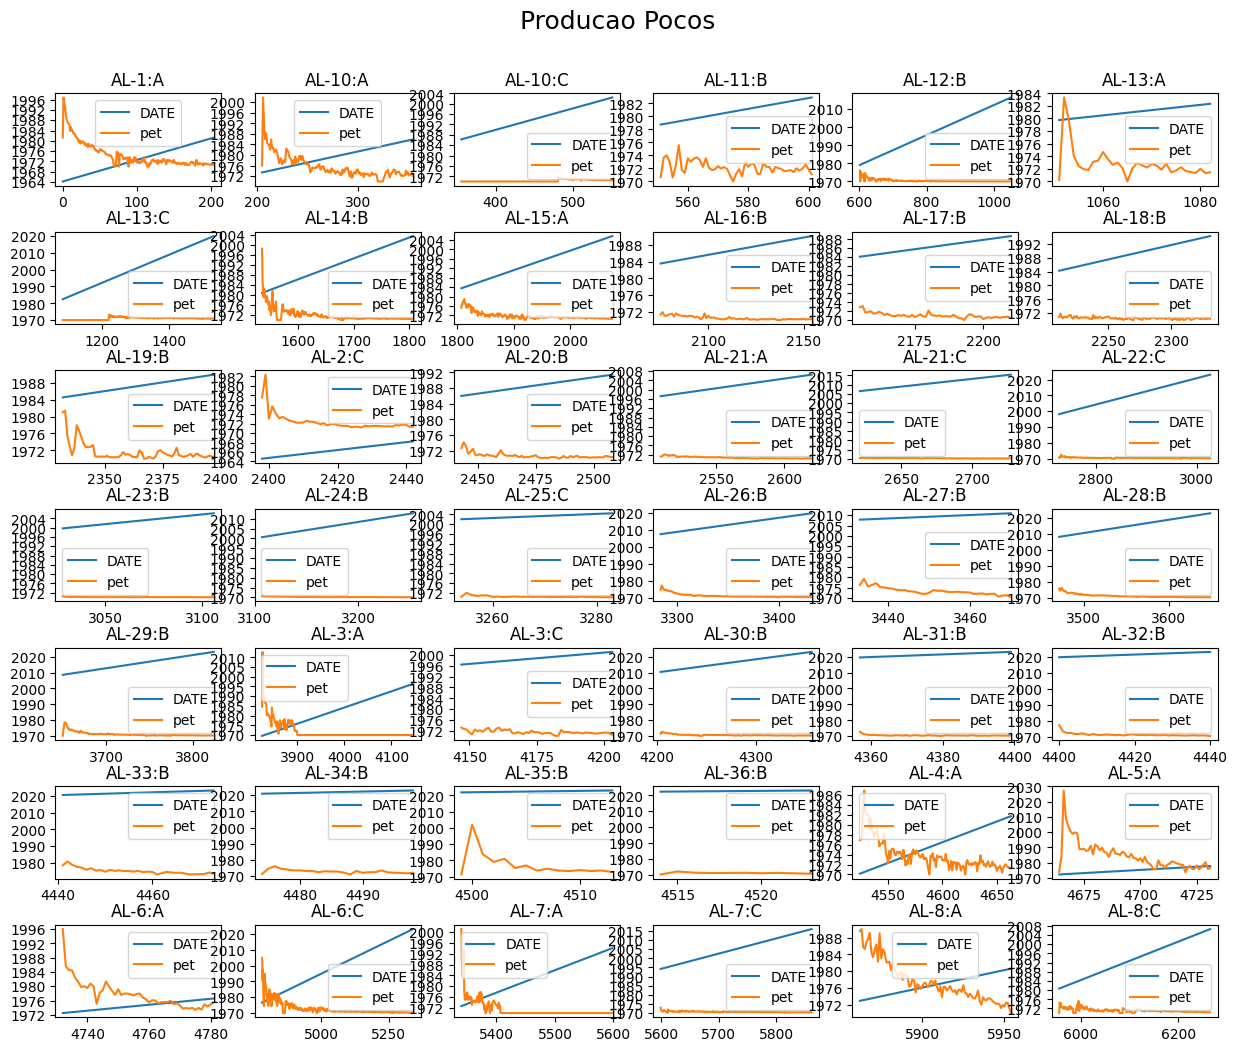

In [387]:
# define subplot grid
fig, axs = plt.subplots(nrows=7, ncols=6, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Producao Pocos", fontsize=18, y=0.95)

# loop through tickers and axes
for Completion, ax in zip(pozos, axs.ravel()):
    # filter df for ticker and plot on specified axes
    df[df["Completion"] == Completion].plot(ax =ax)

    # chart formatting
    ax.set_title(Completion.upper())
    ax.get_legend()
    ax.set_xlabel("")

plt.show()